In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accepted_raw = pd.read_csv('accepted_2007_to_2018q4.csv')

/var/folders/md/t1g4n13933qcy0dyp38vv_380000gn/T/ipykernel_78703/4170564692.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_raw = pd.read_csv('accepted_2007_to_2018q4.csv')


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
accepted_raw.shape

(2260701, 151)

In [5]:
accepted_raw.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [6]:
accepted_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [7]:
accepted_NaN = accepted_raw.isna().sum().sort_values(ascending=False).to_frame()
accepted_NaN = accepted_NaN.rename(columns={0:'Count'})
accepted_NaN['%'] = accepted_NaN['Count']/2260701
accepted_NaN

,Count,%
member_id,2260701,1.000000
orig_projected_additional_accrued_interest,2252050,0.996173
hardship_end_date,2249784,0.995171
hardship_start_date,2249784,0.995171
hardship_type,2249784,0.995171
hardship_reason,2249784,0.995171
hardship_status,2249784,0.995171
deferral_term,2249784,0.995171
hardship_last_payment_amount,2249784,0.995171
hardship_payoff_balance_amount,2249784,0.995171


## Data Cleaning

In [8]:
accepted = accepted_raw.copy()

In [9]:
#33 rows do not have a grade. These will be dropped.
accepted = accepted[accepted['grade'].notna()]

In [10]:
# drop empty ID column
accepted = accepted.drop(['member_id'],axis=1)

In [11]:
#Hardship, Settlement, & Secondary Applicant columns- Consolidate to one column due to low impact (few instances)
accepted['hardship_flag'] = accepted['hardship_flag'].fillna('N')
accepted = accepted.drop(['hardship_end_date','hardship_start_date','hardship_type','hardship_reason',
                          'hardship_status','hardship_last_payment_amount','hardship_payoff_balance_amount',
                          'hardship_loan_status','hardship_dpd','hardship_length','hardship_amount',
                         'deferral_term','payment_plan_start_date','orig_projected_additional_accrued_interest'],axis=1)

accepted['debt_settlement_flag'] = accepted['debt_settlement_flag'].fillna('N')
accepted = accepted.drop(['settlement_term','debt_settlement_flag_date','settlement_status','settlement_date',
                         'settlement_amount','settlement_percentage'],axis=1)

accepted['application_type'] = accepted['application_type'].fillna('NA')
accepted = accepted.drop(['annual_inc_joint','dti_joint','verification_status_joint','revol_bal_joint',
                         'sec_app_fico_range_low','sec_app_fico_range_high','sec_app_earliest_cr_line',
                         'sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util',
                         'sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths',
                         'sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog'],axis=1)

In [12]:
#removing all 'months since' and date columns. Target is % of original investment recovered, time frame does not matter
accepted = accepted.drop(['earliest_cr_line','issue_d','last_credit_pull_d','last_pymnt_d','mo_sin_old_il_acct',
                         'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
                         'mths_since_last_delinq','mths_since_last_major_derog','mths_since_last_record',
                         'mths_since_rcnt_il','mths_since_recent_bc','mths_since_recent_bc_dlq',
                         'mths_since_recent_inq','mths_since_recent_revol_delinq','next_pymnt_d'],axis=1)

In [13]:
#drop columns that provide no insight
accepted = accepted.drop(['id','desc','emp_title','purpose','url','zip_code'],axis=1)

In [14]:
#Quick investigation points toward missing values for negative connotation columns (delinquincies, collections, etc.) 
#to most likely be 0. Replace with 0
na0 = ['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs','delinq_amnt',
      'num_accts_ever_120_pd','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
      'pub_rec','pub_rec_bankruptcies','tax_liens','tot_coll_amt']
for col in na0:
    accepted[col] = accepted[col].fillna(0)

In [15]:
#all other numeric columns replace with column average.
naA = ['acc_open_past_24mths','all_util','annual_inc','avg_cur_bal','bc_open_to_buy','bc_util','dti','il_util',
       'inq_fi','inq_last_12m','inq_last_6mths','max_bal_bc','mort_acc','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats',
      'num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','open_acc','open_acc_6m',
      'open_il_12m','open_il_24m','open_act_il','open_rv_12m','open_rv_24m','pct_tl_nvr_dlq','percent_bc_gt_75',
      'revol_util','tot_cur_bal','tot_hi_cred_lim','total_acc','total_bal_ex_mort','total_bal_il','total_bc_limit',
      'total_cu_tl','total_il_high_credit_limit','total_rev_hi_lim']
for col in naA:
    accepted[col] = accepted[col].fillna(accepted[col].mean())

In [16]:
# make emp_length and term into usable float columns
accepted['emp_length'] = accepted['emp_length'].str.extract('(\d+)', expand=False)
accepted['emp_length'] = accepted['emp_length'].astype(float)
accepted['emp_length'] = accepted['emp_length'].fillna(accepted['emp_length'].mean())

accepted['term'] = accepted['term'].str.extract('(\d+)', expand=False)
accepted['term'] = accepted['term'].astype(float)

In [17]:
# title is a short enough list to possibly be useful, fillna with 'other'
accepted['title'] = accepted['title'].fillna('Other')

In [18]:
accepted['ROI'] = (accepted['total_pymnt_inv']/accepted['funded_amnt_inv']).round(2)

In [19]:
# where ROI is null, investment equals 0, (ROI=Return/Investment), therefore those rows are not useful to this project
accepted = accepted[accepted['ROI'].notna()]

In [20]:
accepted_NaN2 = accepted.isna().sum().sort_values(ascending=False).to_frame()
accepted_NaN2 = accepted_NaN2.rename(columns={0:'Count'})
accepted_NaN2['%'] = accepted_NaN2['Count']/2260701
accepted_NaN2

,Count,%
loan_amnt,0,0.0
inq_last_12m,0,0.0
num_actv_bc_tl,0,0.0
num_accts_ever_120_pd,0,0.0
mort_acc,0,0.0
delinq_amnt,0,0.0
chargeoff_within_12_mths,0,0.0
bc_util,0,0.0
bc_open_to_buy,0,0.0
avg_cur_bal,0,0.0


In [21]:
# The necessary info is present for this category, going to ignore and merge with main Fully Paid/Charged Off cols
accepted = accepted.replace({'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid'}, regex=True)
accepted = accepted.replace({'Does not meet the credit policy. Status:Charged Off': 'Charged Off'}, regex=True)

In [22]:
accepted['loan_status'].value_counts()

Fully Paid            1078562
Current                878317
Charged Off            269264
Late (31-120 days)      21467
In Grace Period          8436
Late (16-30 days)        4349
Default                    40
Name: loan_status, dtype: int64

In [23]:
accepted['FICO'] = (accepted['fico_range_high']+accepted['fico_range_low'])/2

## First Visualizations

In [24]:
completed = accepted.copy()
completed = completed.loc[(completed['loan_status'] == 'Fully Paid') | (completed['loan_status'] == 'Charged Off')]
completed.head(100)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,ROI,FICO
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10.000000,MORTGAGE,55000.0,Not Verified,Fully Paid,n,Debt consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.00,0.00,0.0000,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,4981.0,36.00000,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.000000,37.200000,0.0,0.0,1.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.000000,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,1.23,677.0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10.000000,MORTGAGE,65000.0,Not Verified,Fully Paid,n,Business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.00,0.00,0.0000,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,18005.0,73.00000,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.000000,27.100000,0.0,0.0,4.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.700000,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,1.04,717.0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10.000000,MORTGAGE,63000.0,Not Verified,Fully Paid,n,Other,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.00,2705.92,0.00,0.00,0.0000,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,10827.0,73.00000,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.000000,55.900000,0.0,0.0,5.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.000000,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,1.14,697.0
4,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3.000000,MORTGAGE,104433.0,Source Verified,Fully Paid,n,Major purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.00,0.00,0.0000,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,73839.0,84.00000,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.000000,77.500000,0.0,0.0,6.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.000000,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,1.13,697.0
5,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,C3,4.000000,RENT,34000.0,Source Verified,Fully Paid,n,Debt consolidation,GA,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.00,1758.95,0.00,0.00,0.0000,7653.56,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,3976.0,99.00000,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.000000,91.000000,0.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.000000,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,1.15,692.0
6,20000.0,20000.0,2

In [25]:
completed['earnings'] = (completed['ROI']*completed['funded_amnt_inv'])-completed['funded_amnt_inv']

In [26]:
lstatus = pd.DataFrame({'grade':['A','B','C','D','E','F','G']}).set_index('grade')

fp = completed.loc[completed['loan_status'] == 'Fully Paid']
co = completed.loc[completed['loan_status'] == 'Charged Off']

fp_grades = fp['grade'].value_counts().to_frame().reset_index()
fp_grades = fp_grades.rename(columns={'grade':'FP Count','index':'grade'}).sort_values('grade')

co_grades = co['grade'].value_counts().to_frame().reset_index()
co_grades = co_grades.rename(columns={'grade':'CO Count','index':'grade'}).sort_values('grade')

lstatus = pd.merge(lstatus,fp_grades,on='grade',how='outer')
lstatus = pd.merge(lstatus,co_grades,on='grade',how='outer')
lstatus['FP%'] = ((lstatus['FP Count']*100)/(lstatus['FP Count']+lstatus['CO Count'])).round(2)
lstatus['CO%'] = ((lstatus['CO Count']*100)/(lstatus['FP Count']+lstatus['CO Count'])).round(2)
lstatus

,grade,FP Count,CO Count,FP%,CO%
0,A,220938,14207,93.96,6.04
1,B,340410,52641,86.61,13.39
2,C,296471,85783,77.56,22.44
3,D,140369,61235,69.63,30.37
4,E,57978,36186,61.57,38.43
5,F,17712,14582,54.85,45.15
6,G,4684,4630,50.29,49.71


In [27]:
lstatus['grade']=lstatus['grade'].astype('category').cat.codes
lstatus['grade'].corr(lstatus['CO%'])

0.9966458483501444

Text(0.5, 0.98, 'Fully Paid vs Charged Off Loans')

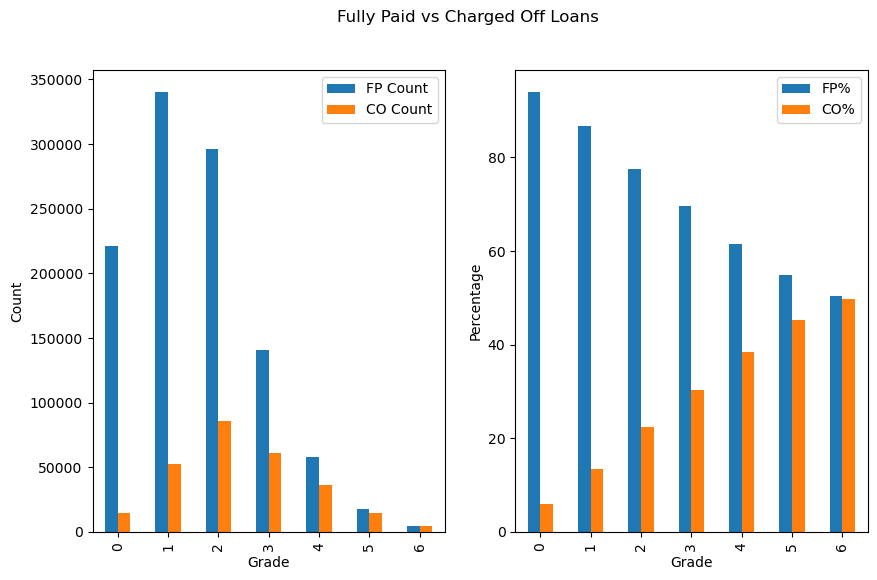

In [28]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
lstatus.plot(ax=axes[0],x='grade',y=['FP Count','CO Count'],kind='bar')
lstatus.plot(ax=axes[1],x='grade',y=['FP%','CO%'],kind='bar')
axes[0].set(xlabel = 'Grade',ylabel='Count')
axes[1].set(xlabel = 'Grade',ylabel='Percentage')
fig.suptitle('Fully Paid vs Charged Off Loans')

In [29]:
rois = completed[['grade','ROI','funded_amnt_inv']]
rois['earnings'] = (rois['ROI']*rois['funded_amnt_inv'])-rois['funded_amnt_inv']
roi = rois.groupby('grade').mean().round(2).reset_index()
roi

/var/folders/md/t1g4n13933qcy0dyp38vv_380000gn/T/ipykernel_78703/1720745808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rois['earnings'] = (rois['ROI']*rois['funded_amnt_inv'])-rois['funded_amnt_inv']


,grade,ROI,funded_amnt_inv,earnings
0,A,1.05,13865.31,748.90
1,B,1.05,13200.88,694.71
2,C,1.03,14153.38,391.05
3,D,1.01,15214.44,80.62
4,E,0.99,17501.19,-220.63
5,F,0.97,18940.45,-739.24
6,G,0.91,20283.29,-1746.23


Text(0.5, 0.98, 'Return on Investment for Loan Grades')

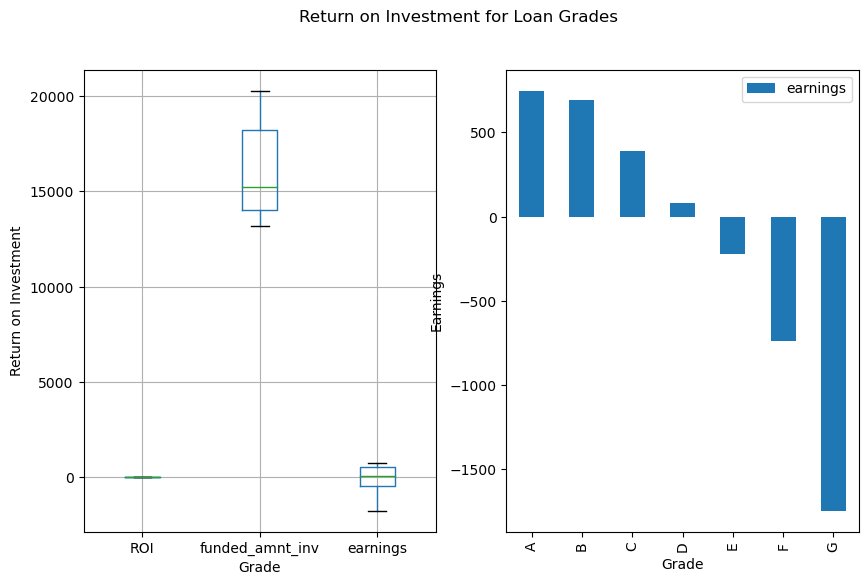

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
roi.boxplot(ax=axes[0])
roi.plot(ax=axes[1],x='grade',y='earnings',kind='bar')
axes[0].set(xlabel = 'Grade',ylabel='Return on Investment')
axes[1].set(xlabel = 'Grade',ylabel='Earnings')
fig.suptitle('Return on Investment for Loan Grades')

<function matplotlib.pyplot.show(close=None, block=None)>

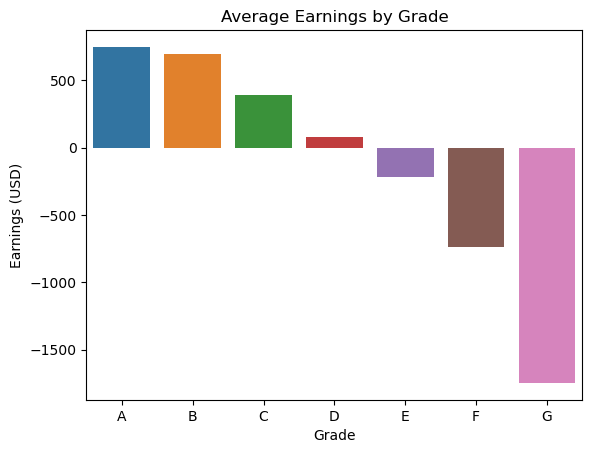

In [31]:
sns.barplot(x=roi['grade'],y=roi['earnings'],order=['A', 'B', 'C','D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('Earnings (USD)')
plt.title('Average Earnings by Grade')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

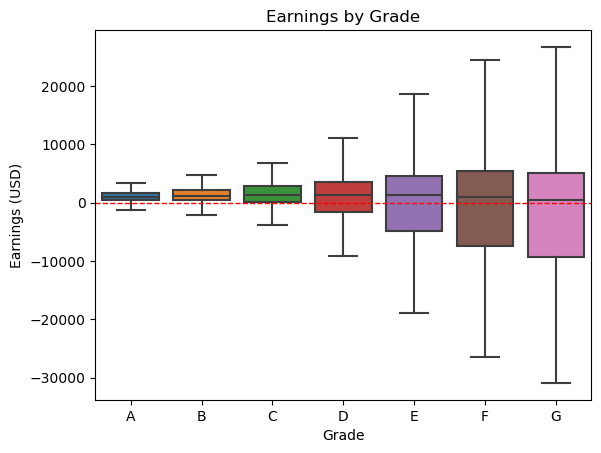

In [32]:
sns.boxplot(x=completed['grade'],y=completed['earnings'],order=['A', 'B', 'C','D','E','F','G'],showfliers=False)
plt.axhline(linewidth=1,color='r', ls='--')
plt.xlabel('Grade')
plt.ylabel('Earnings (USD)')
plt.title('Earnings by Grade')
plt.show

#### Report numerical column averages and search for trends

In [33]:
numer = completed.copy()
numer = numer.drop(['sub_grade','home_ownership','verification_status','loan_status','pymnt_plan','title',
                    'application_type','addr_state','initial_list_status','application_type',
                   'hardship_flag','disbursement_method','debt_settlement_flag'],axis=1)
numer.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,ROI,FICO,earnings
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,10.0,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,1.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,1.23,677.0,828.0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,10.0,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,4.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,1.04,717.0,988.0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,10.0,63000.0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,5.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,1.14,697.0,2800.0
4,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,3.0,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,6.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,1.13,697.0,1352.0
5,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,4.0,34000.0,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,1.15,692.0,1792.5


In [34]:
numer_mean = numer.groupby('grade').mean().round(1)#.reset_index()
numer_mean

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,ROI,FICO,earnings
grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,13890.5,13880.8,13865.3,36.6,7.1,423.7,6.1,88957.5,15.6,0.2,727.5,731.5,0.4,11.9,0.1,18276.9,38.7,26.5,0.0,0.0,14630.1,14613.5,13392.2,1188.4,0.5,49.0,8.2,4832.1,728.5,721.5,0.0,1.0,0.0,131.3,175202.4,0.9,2.7,0.6,1.5,35206.7,67.7,1.2,2.6,5964.3,52.6,47263.3,0.9,1.5,1.9,3.8,16658.8,20528.8,44.5,0.0,4.8,2.0,0.3,3.6,5.1,5.2,8.9,8.7,8.5,15.5,5.1,12.0,0.0,0.0,0.0,1.5,96.1,26.7,0.1,0.0,226505.6,52055.0,33590.2,44831.8,1.1,729.5,748.9
B,13234.1,13225.9,13200.9,38.9,10.7,403.7,6.1,76472.3,17.4,0.3,697.1,701.1,0.5,11.4,0.2,16038.3,50.7,24.9,0.0,0.0,13921.7,13895.3,12068.6,1731.7,1.1,120.4,20.0,4942.3,689.4,677.4,0.0,1.0,0.0,247.4,140544.6,0.9,2.8,0.7,1.6,35005.1,69.4,1.3,2.8,5698.5,56.9,32750.5,1.0,1.5,2.0,4.3,13621.0,10221.5,58.6,0.0,12.6,1.7,0.5,3.6,5.5,4.7,8.2,8.4,8.2,14.7,5.5,11.5,0.0,0.0,0.1,1.8,93.9,42.7,0.1,0.1,174190.4,47987.1,21764.8,40858.9,1.1,699.1,694.7
C,14181.1,14176.1,14153.4,42.6,14.0,425.4,6.0,72701.9,18.9,0.4,688.0,692.0,0.7,11.5,0.2,15712.7,55.2,24.5,0.0,0.0,14568.1,14544.5,11864.1,2456.0,1.7,246.3,41.5,5586.7,664.6,645.4,0.0,1.0,0.0,278.1,132260.2,1.0,2.8,0.7,1.7,35721.8,70.5,1.4,2.9,5631.9,58.9,29109.2,1.1,1.5,2.2,4.9,12681.4,7573.3,64.0,0.0,18.8,1.6,0.5,3.7,5.8,4.6,7.8,8.5,8.2,14.2,5.7,11.5,0.0,0.0,0.1,2.2,93.6,50.1,0.2,0.1,160936.3,48949.4,18610.1,41315.1,1.0,690.0,391.1
D,15250.8,15244.7,15214.4,44.9,17.7,469.0,6.0,70148.3,20.2,0.4,683.3,687.3,0.9,11.5,0.2,15441.7,57.9,24.3,0.0,0.0,15325.5,15295.2,11655.7,3280.3,2.4,387.2,64.8,5803.8,647.6,622.5,0.0,1.0,0.0,269.7,126867.0,1.1,2.8,0.8,1.7,36283.7,71.1,1.4,3.0,5581.4,59.8,27126.0,1.1,1.5,2.3,5.3,12027.9,6220.2,66.9,0.0,21.2,1.5,0.5,3.7,5.9,4.6,7.6,8.7,8.2,14.1,5.9,11.6,0.0,0.0,0.1,2.5,93.6,54.1,0.2,0.1,152919.9,49748.7,16823.7,42124.7,1.0,685.3,80.6
E,17568.7,17548.3,17501.2,50.7,21.1,527.3,6.1,71984.3,20.8,0.4,682.0,686.0,1.0,11.8,0.2,16249.6,59.1,24.9,0.0,0.0,17330.1,17280.5,12112.2,4600.5,3.0,614.3,101.8,6627.3,636.5,606.7,0.0,1.0,0.0,216.7,130771.9,1.1,2.8,0.8,1.8,36742.0,71.4,1.5,3.1,5608.7,59.9,27653.8,1.2,1.6,2.4,5.6,12146.7,6028.4,67.7,0.0,18.1,1.5,0.5,3.7,6.1,4.6,7.7,8.9,8.4,14.3,6.0,11.8,0.0,0.0,0.1,2.7,93.9,55.5,0.2,0.1,156771.5,52308.8,16879.7,43881.7,1.0,684.0,-220.6
F,19036.9,19008.3,18940.5,54.4,24.9,584.5,6.1,73098.6,20.9,0.4,679.8,683.8,1.2,12.0,0.2,16182.1,60.1,25.1,0.0,0.0,18266.8,18201.3,11750.8,5671.3,3.6,841.0,136.3,6882.9,625.9,591.2,0.0,1.0,0.0,233.0,129907.7,1.2,2.9,0.9,1.9,37739.3,72.1,1.5,3.1,5621.8,60.7,27059.2,1.2,1.6,2.6,6.0,11961.3,5759.2,68.7,0.0,17.8,1.5,0.5,3.7,6.1,4.6,7.7,9.1,8.5,14.3,6.1,12.0,0.0,0.0,0.1,2.9,94.0,56.9,0.2,0.1,154868.6,53213.4,16429.9,44722.0,1.0,681.8,-739.2
G,20428.1,20404.5,20283.3,55.7,27.6,657.3,6.0,76505.2,21.4,0.4,678.2,682.2,1.3,12.3,0.2,16908.7,59.1,25.3,0.0,0.0,18655.7,18536.1,11728.3,5938.3,5.0,984.0,160.7,7493.1,618.8,578.0,0.0,1.0,0.

/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


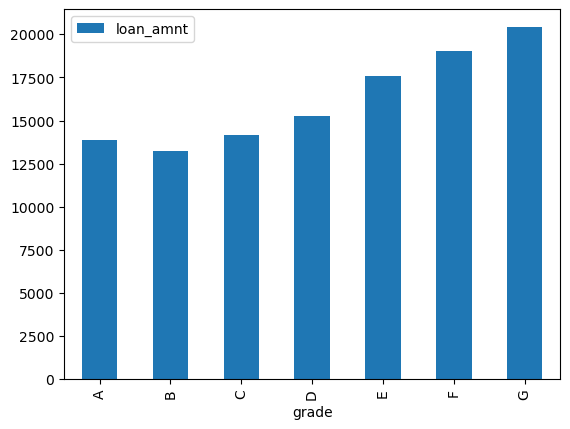

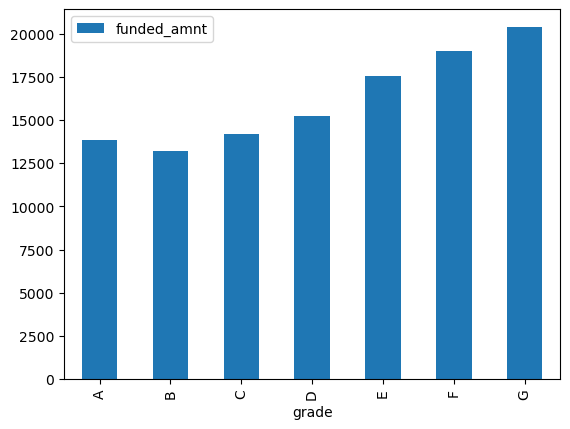

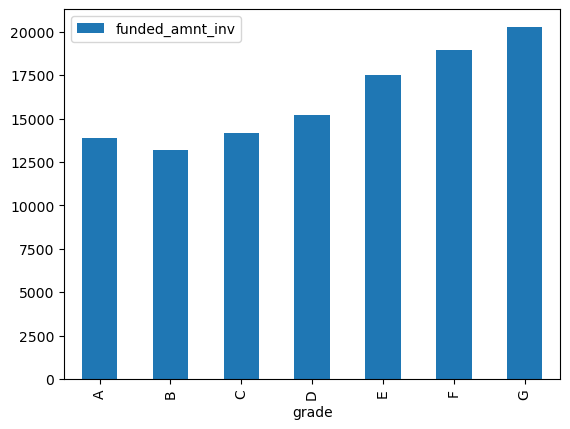

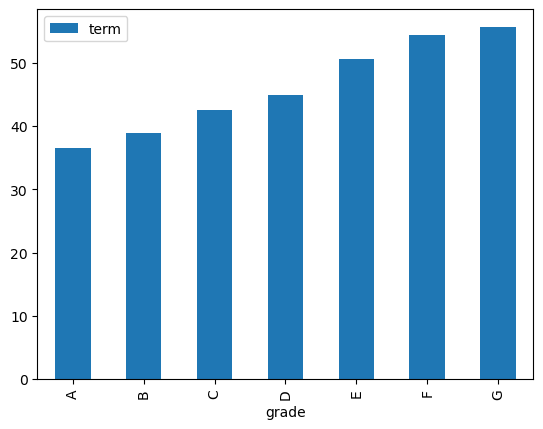

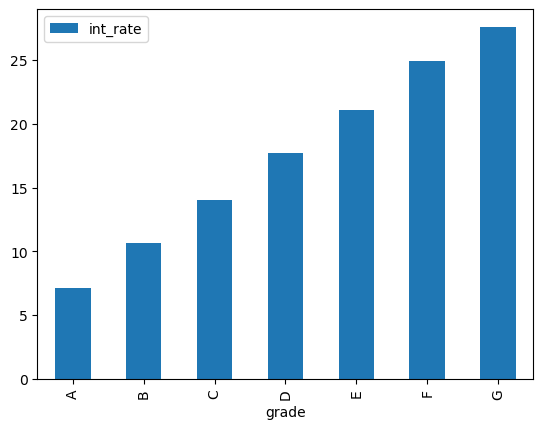

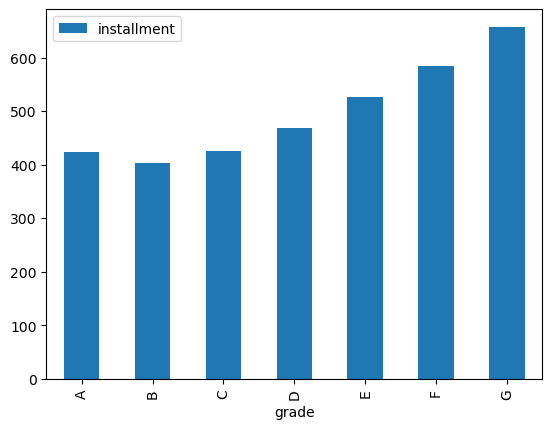

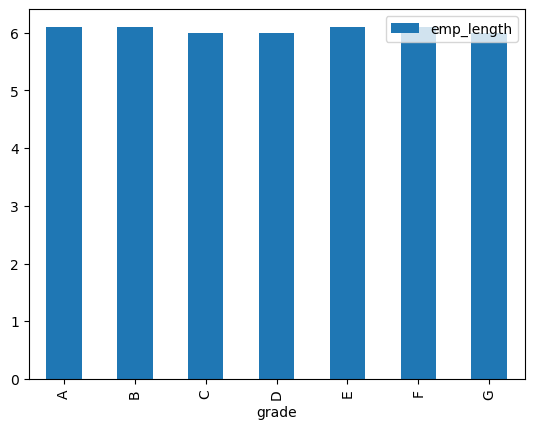

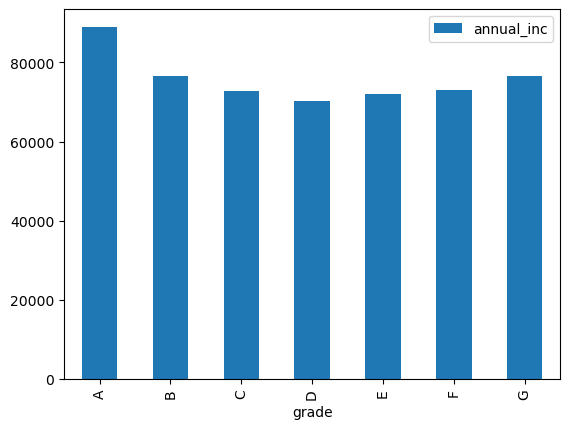

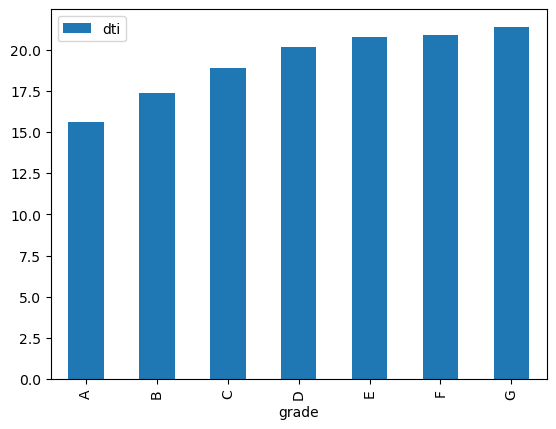

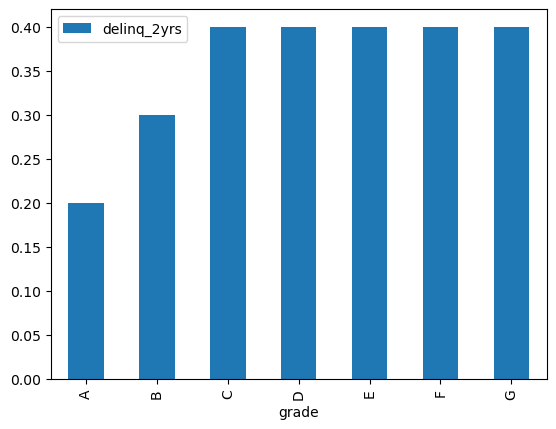

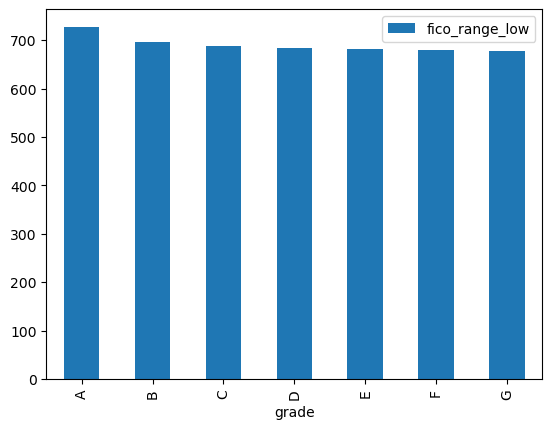

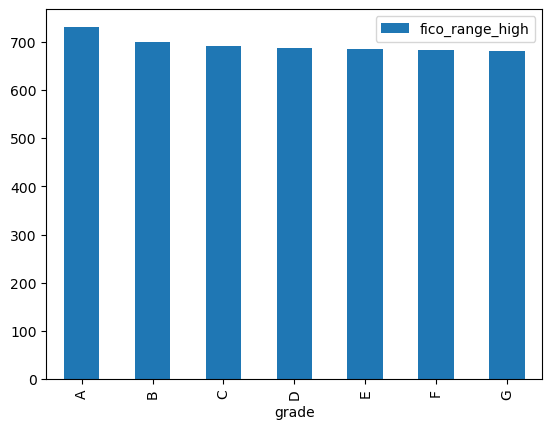

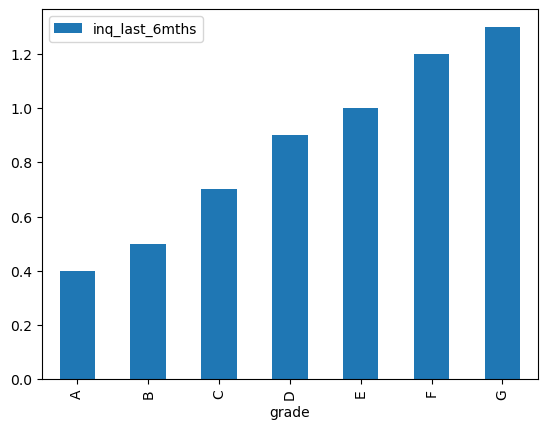

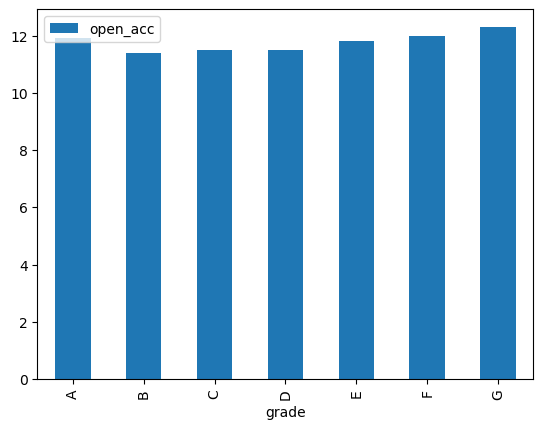

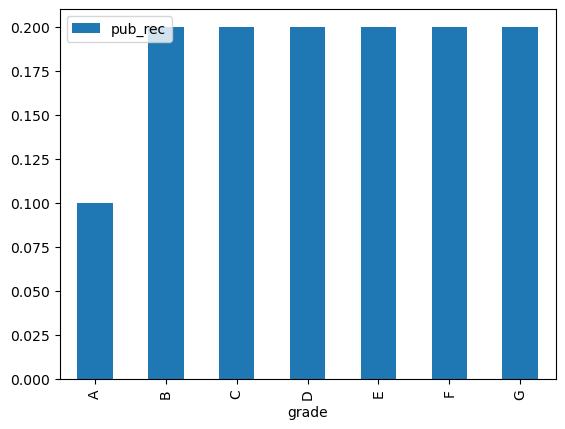

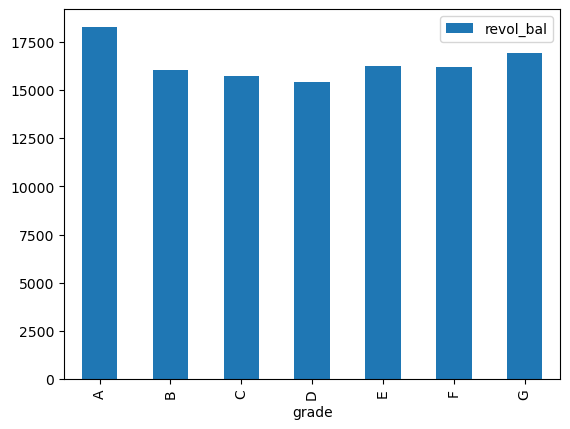

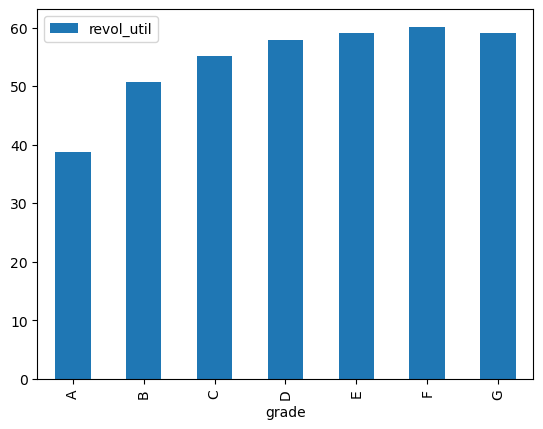

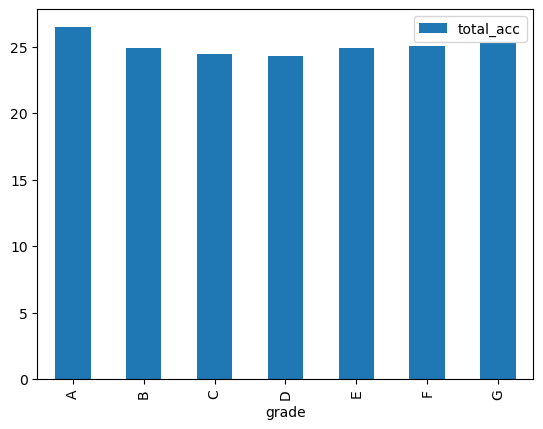

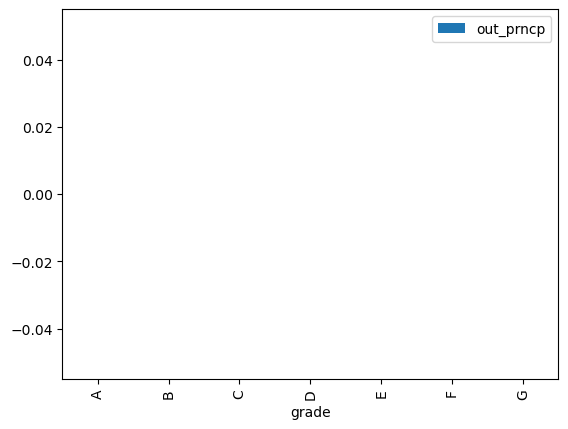

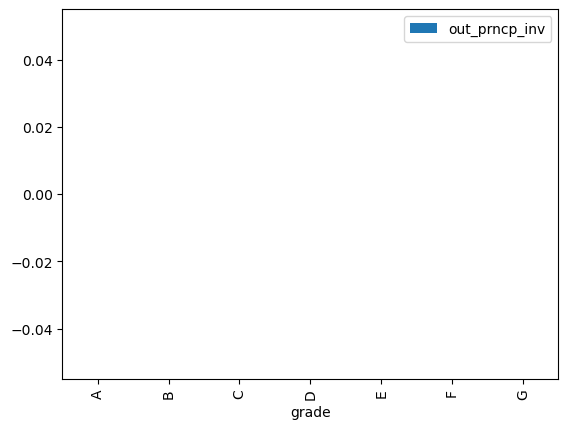

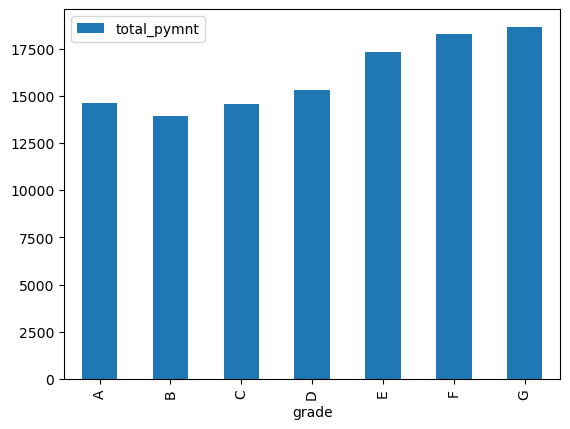

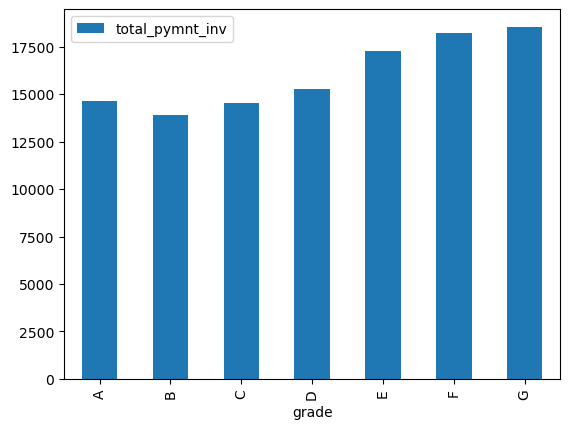

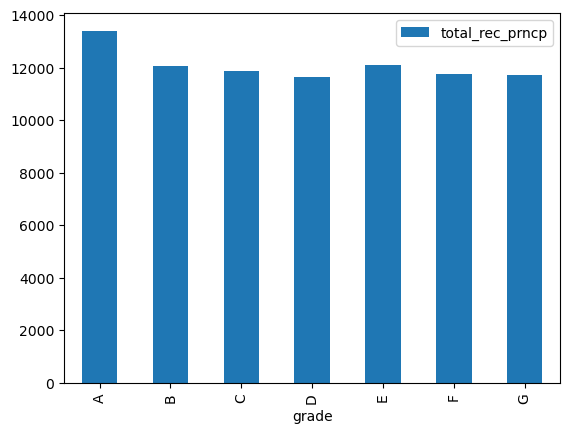

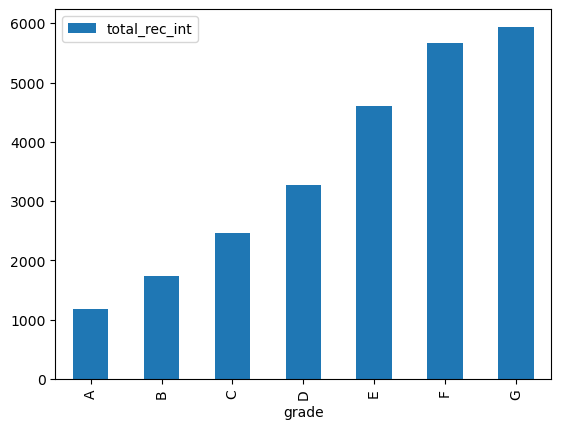

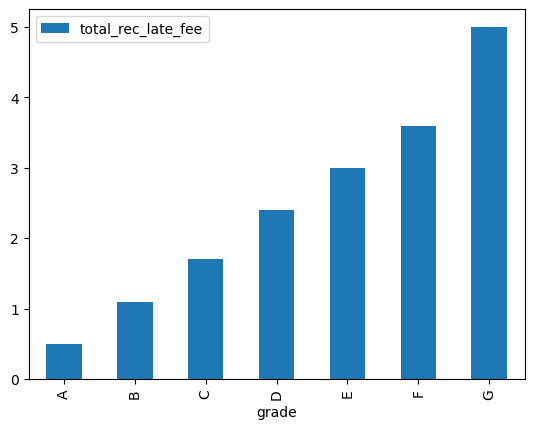

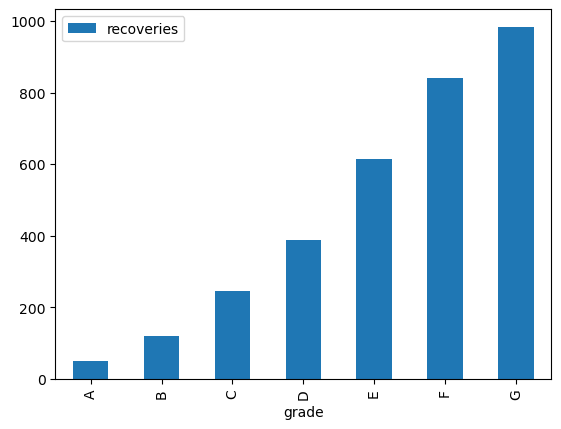

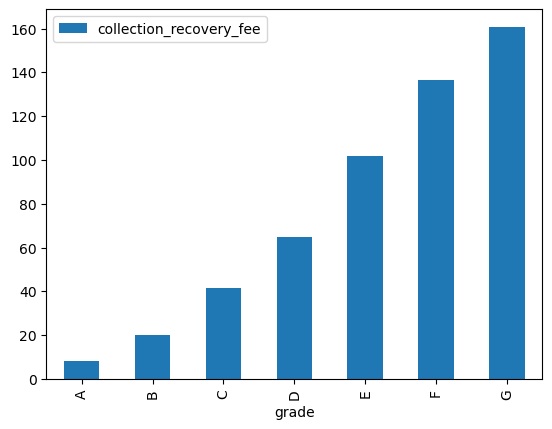

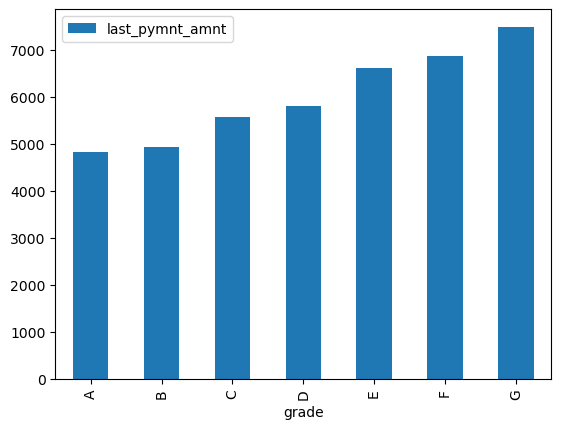

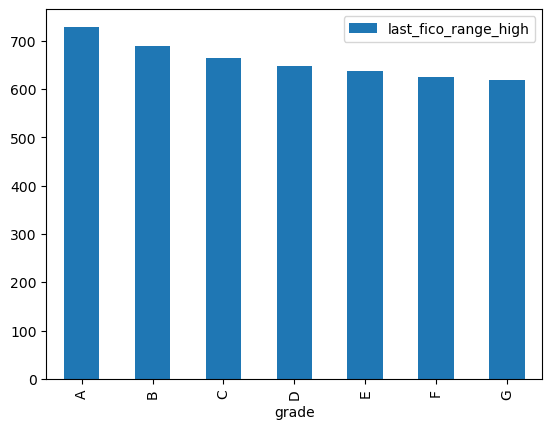

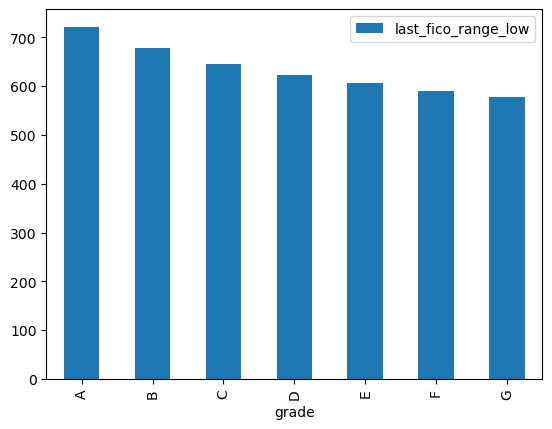

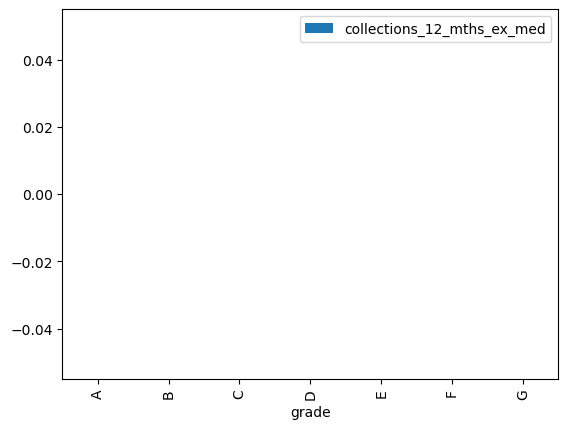

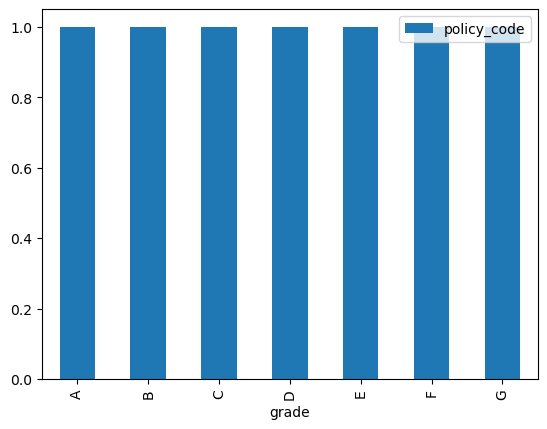

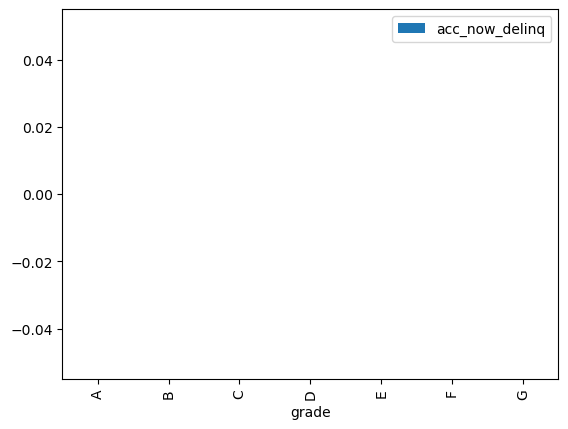

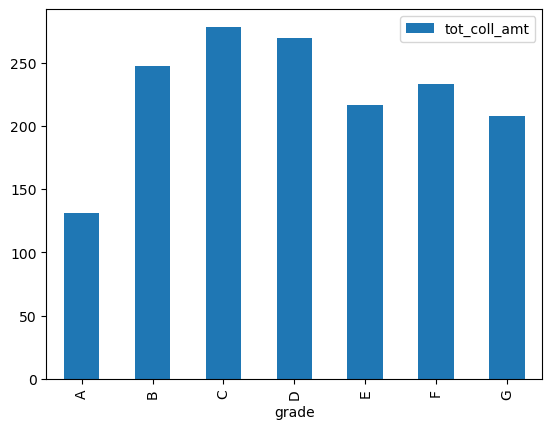

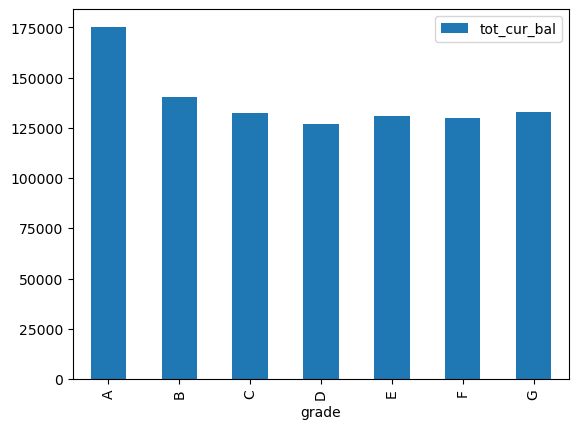

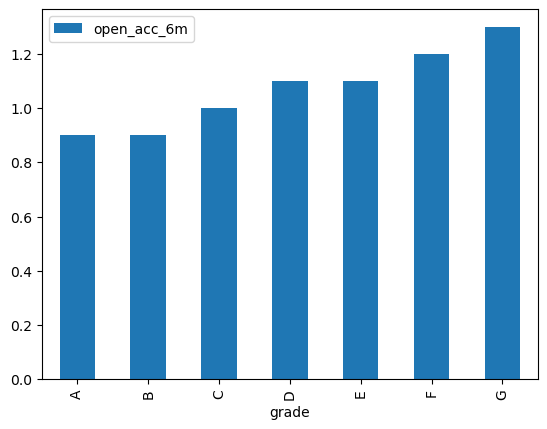

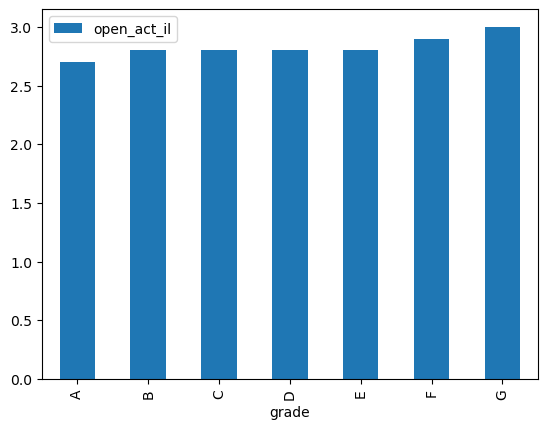

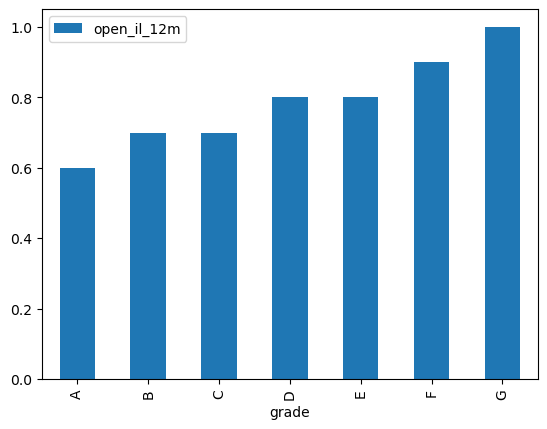

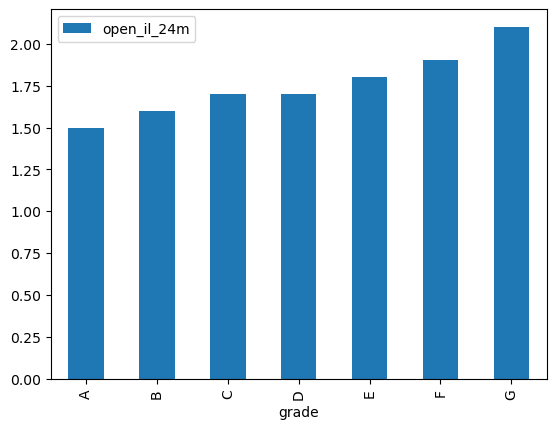

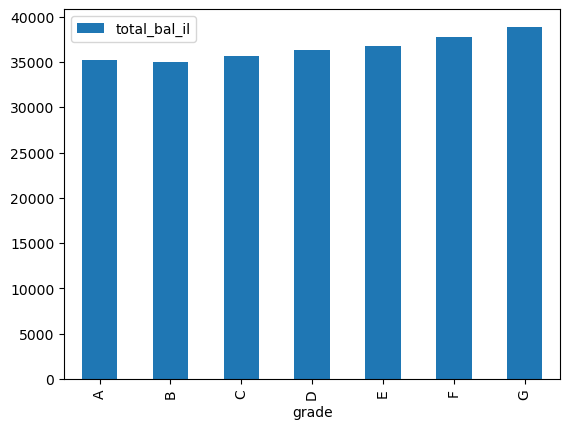

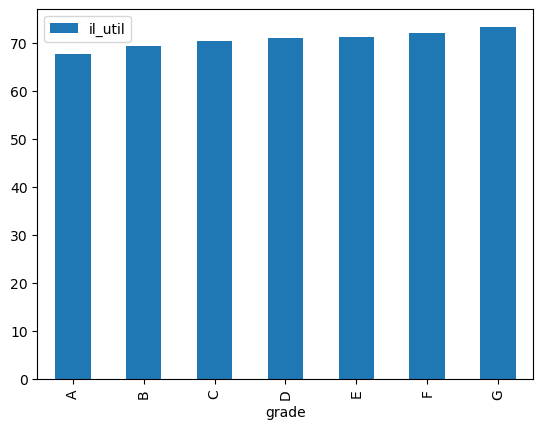

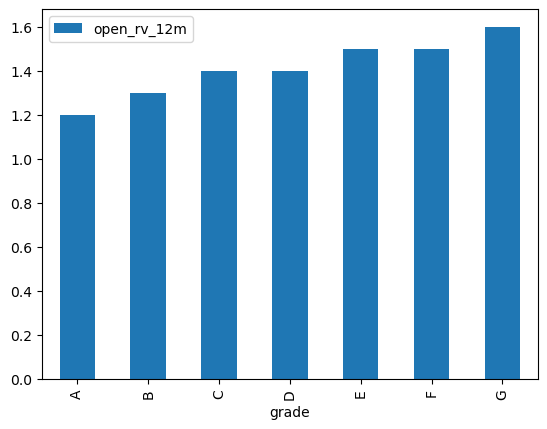

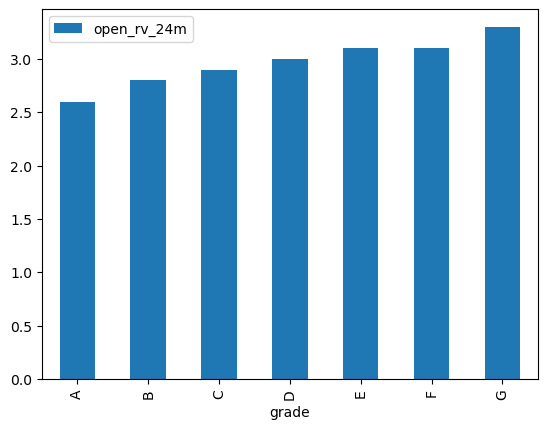

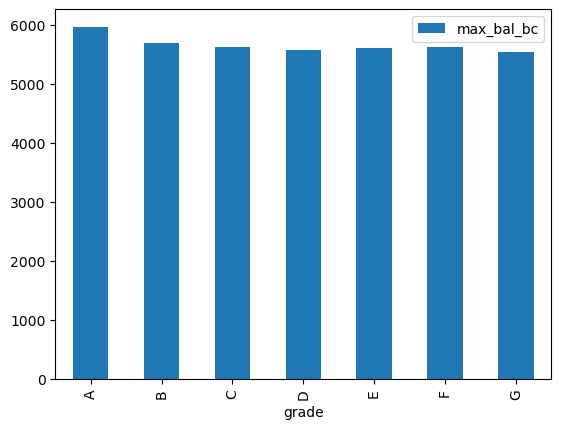

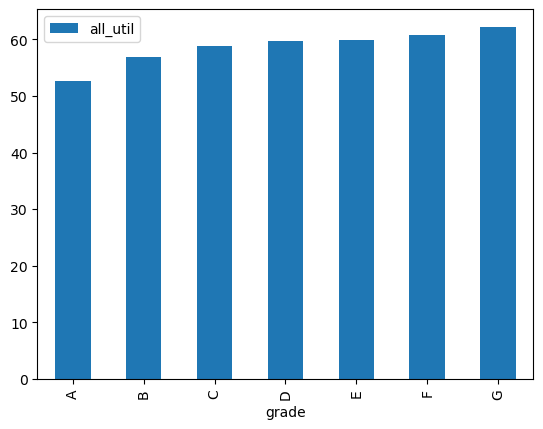

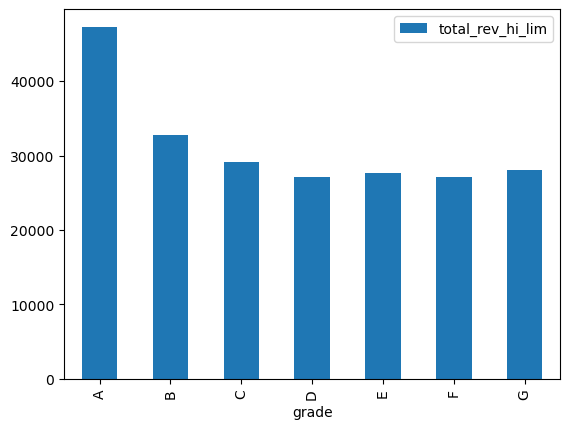

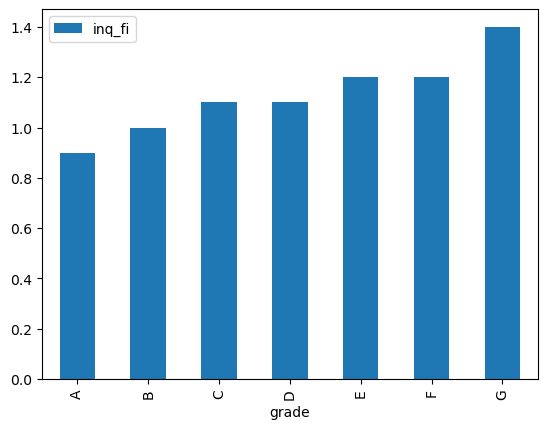

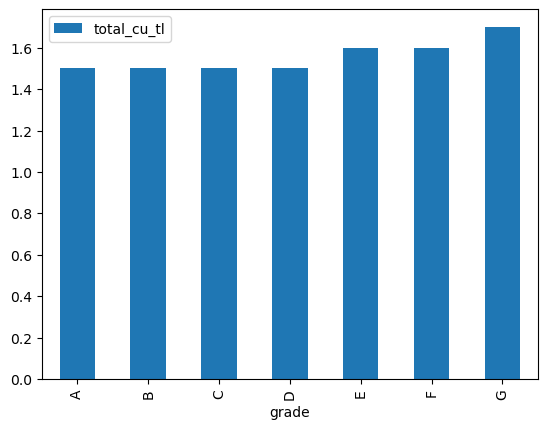

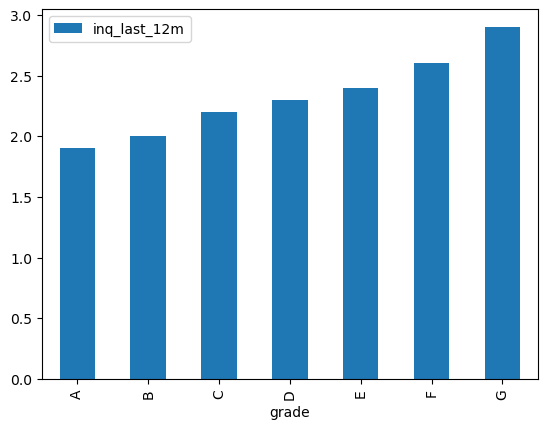

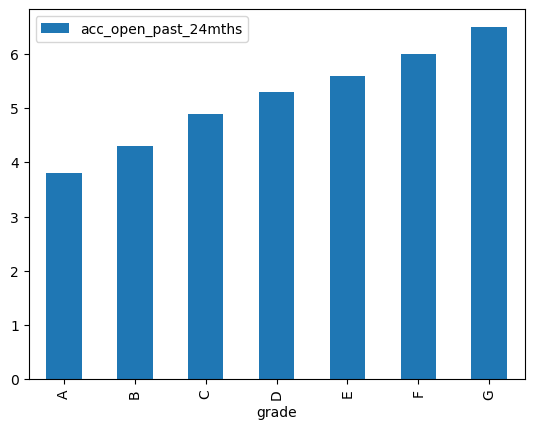

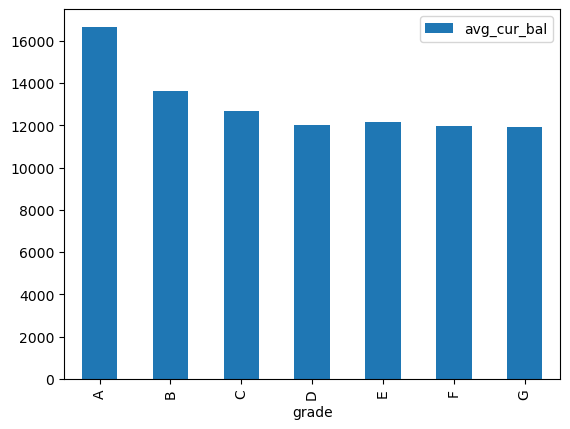

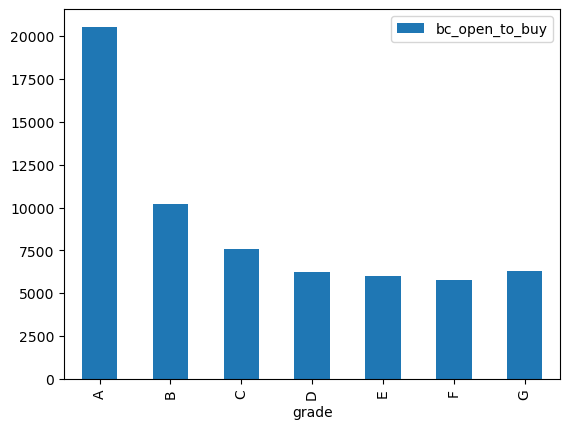

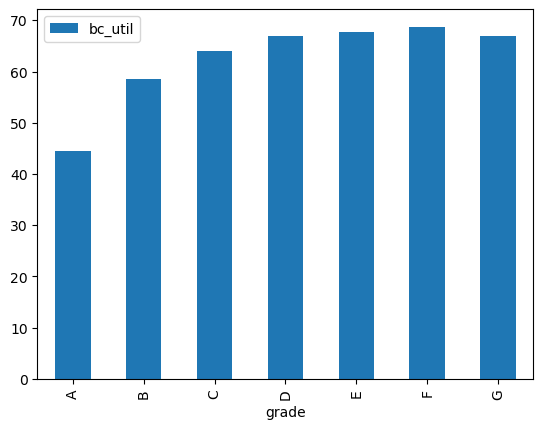

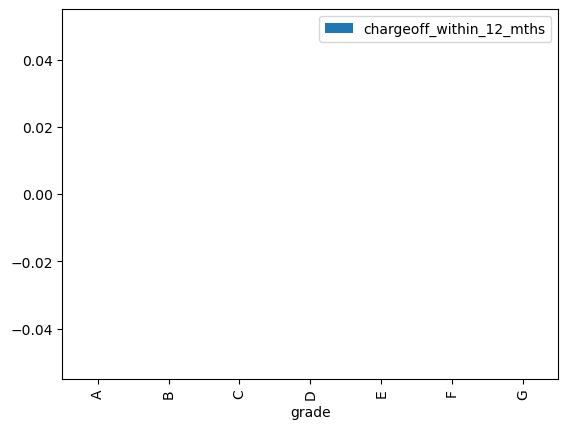

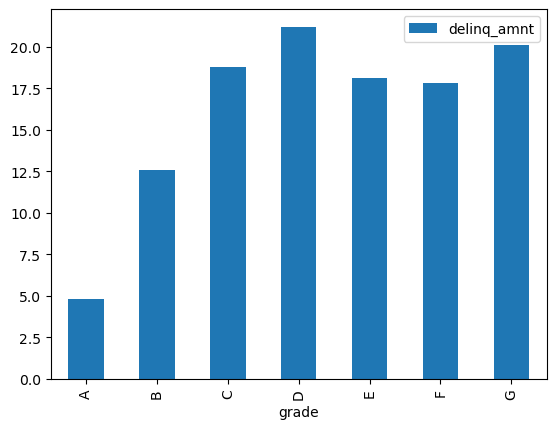

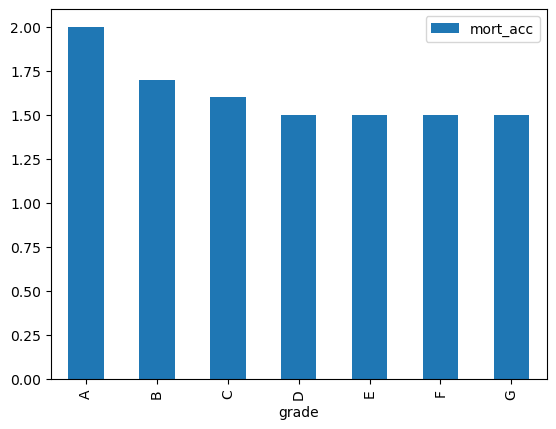

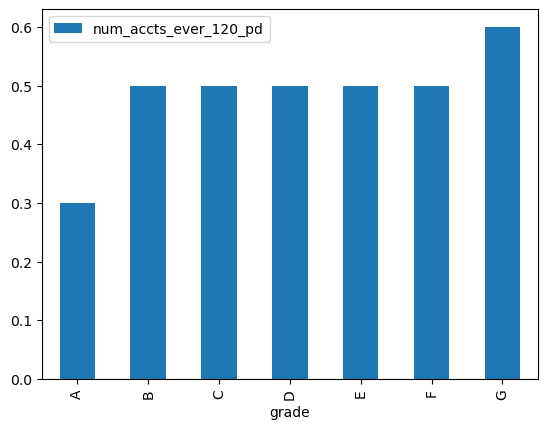

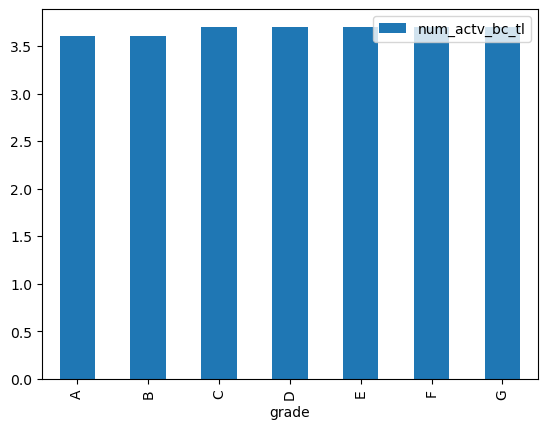

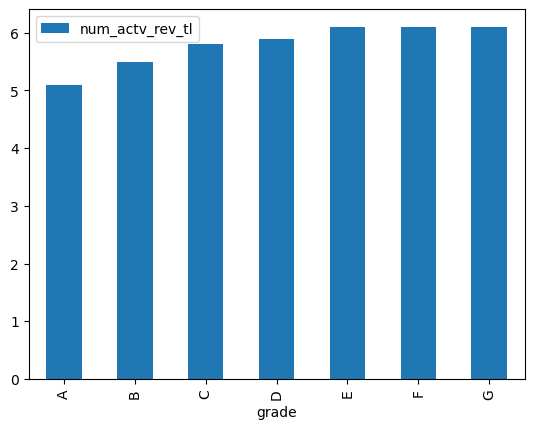

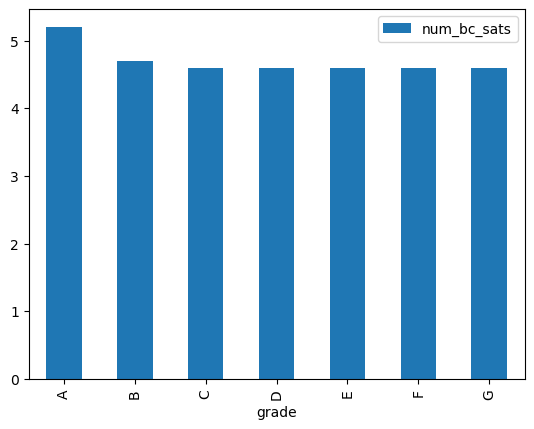

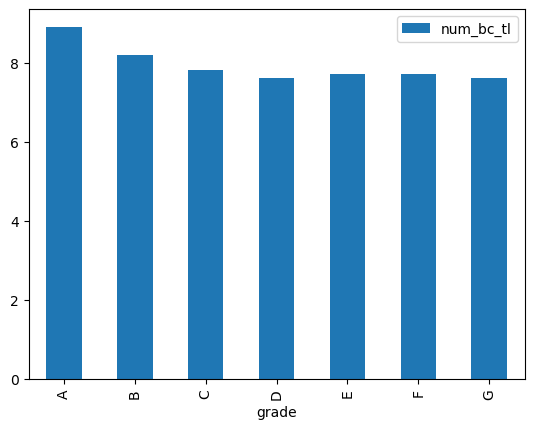

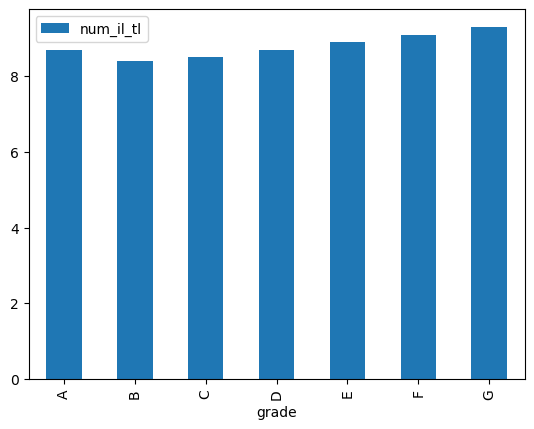

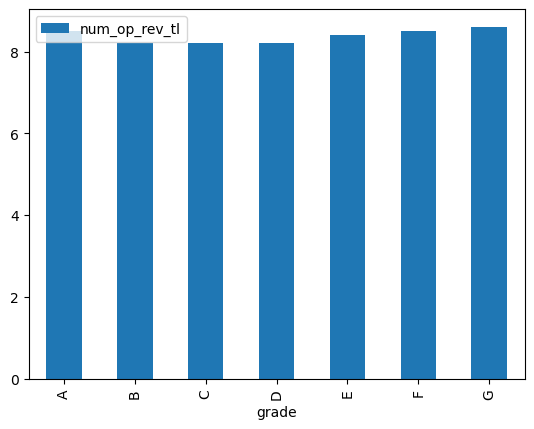

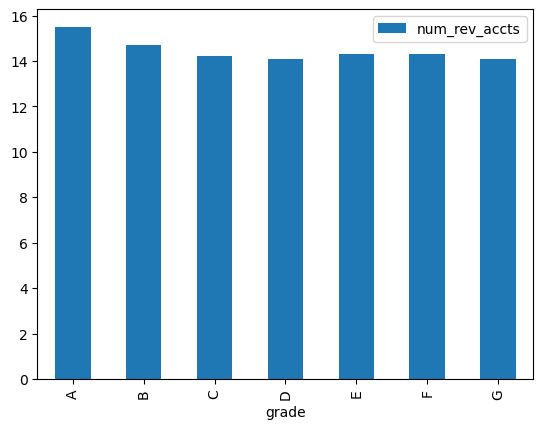

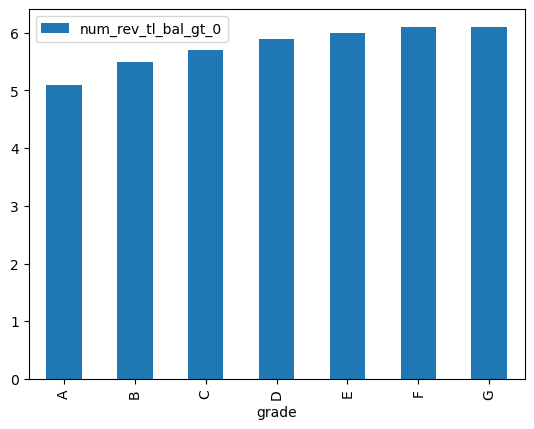

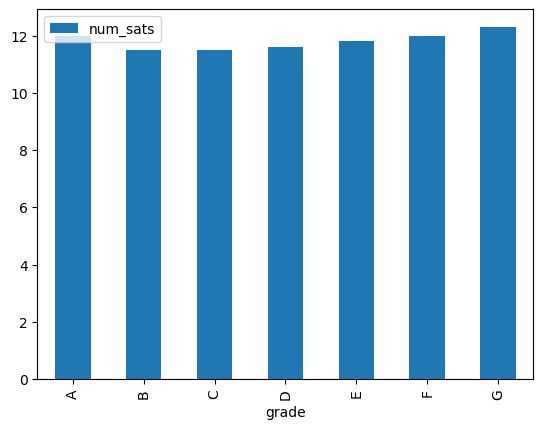

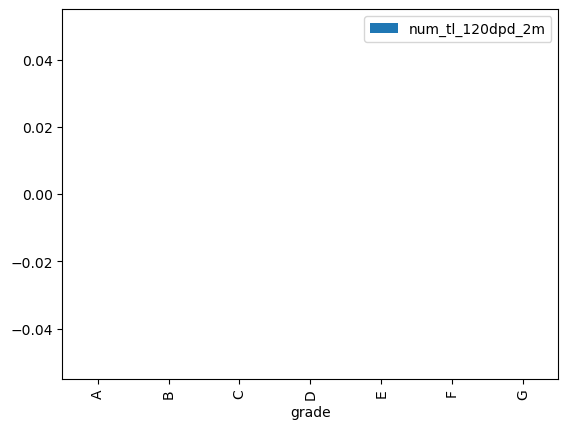

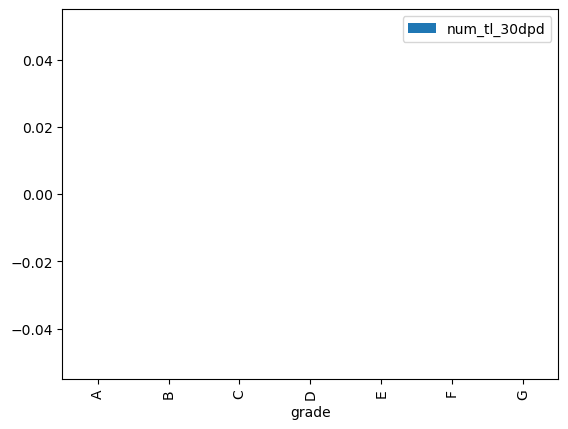

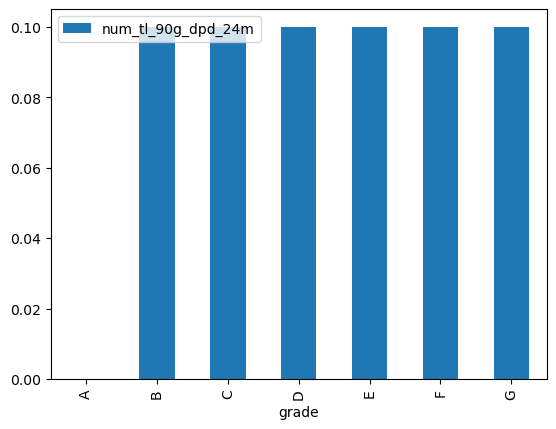

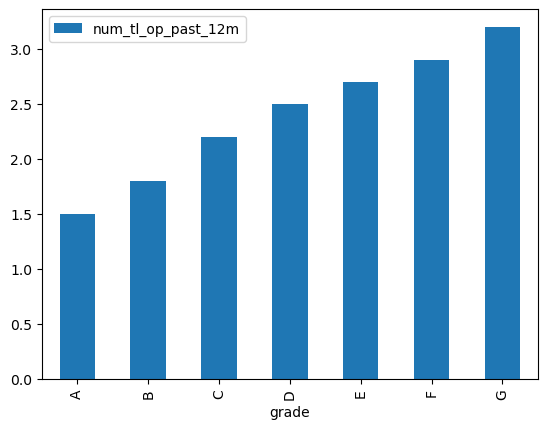

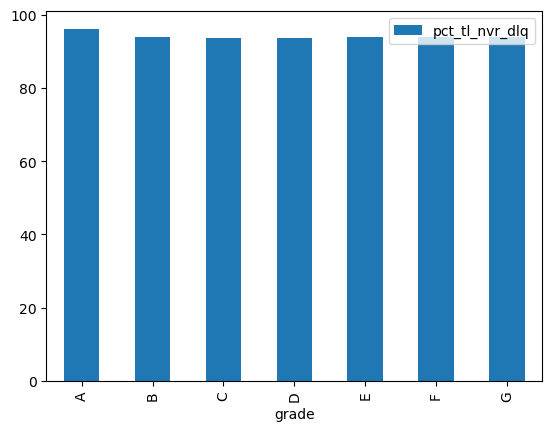

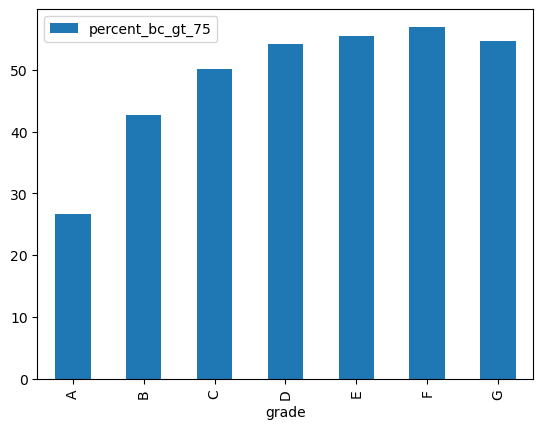

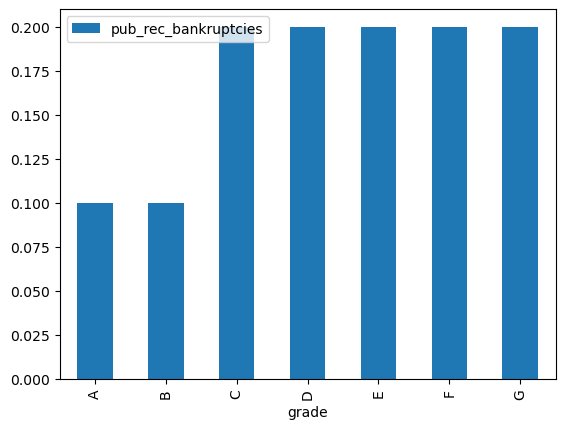

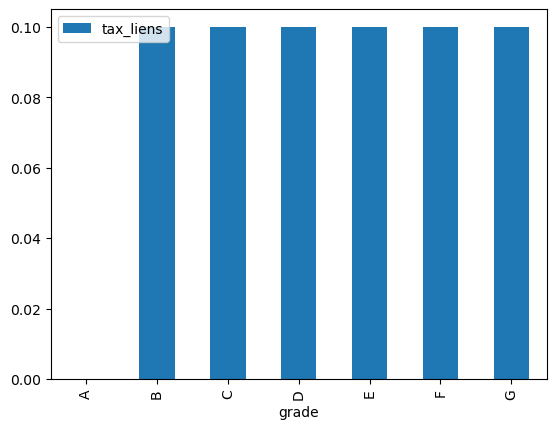

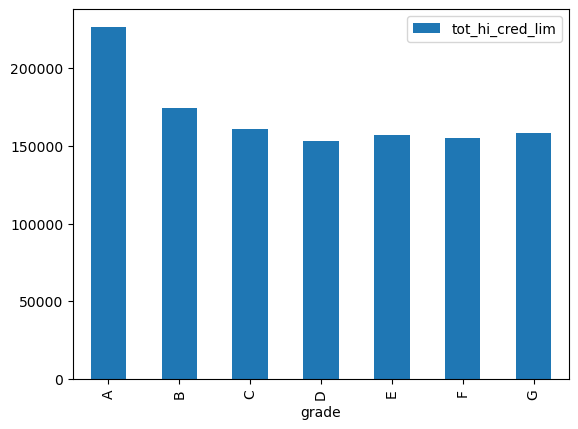

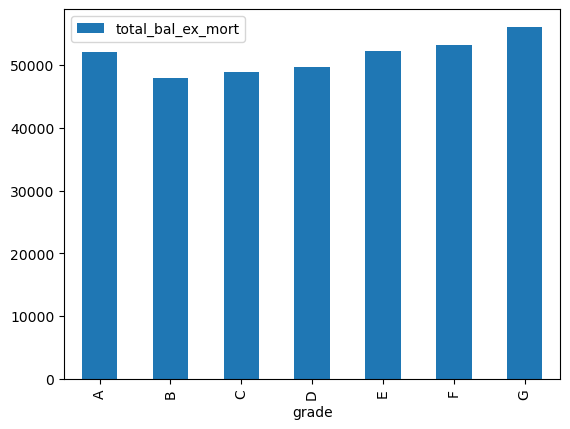

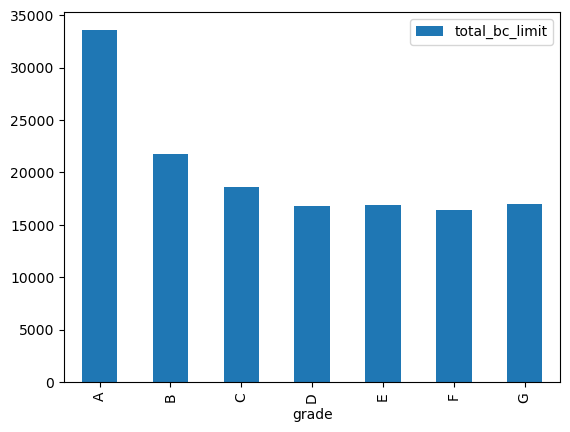

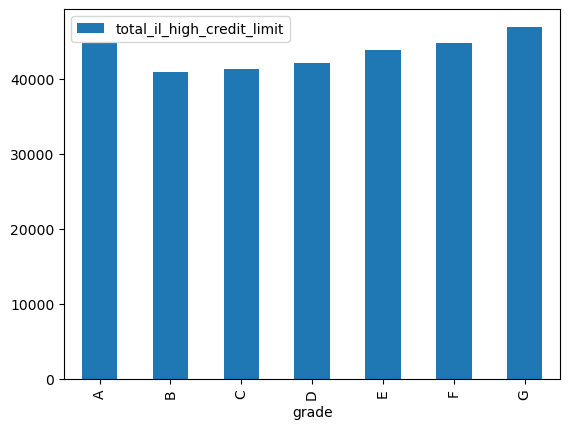

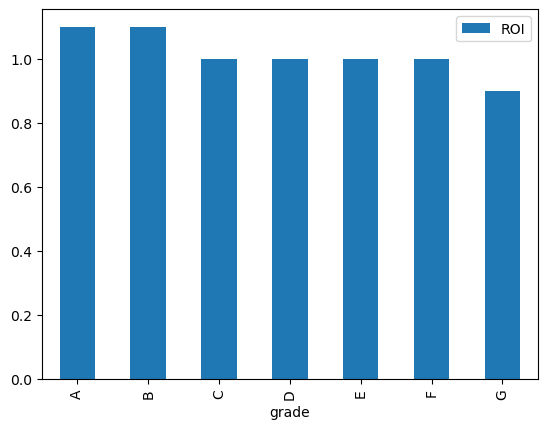

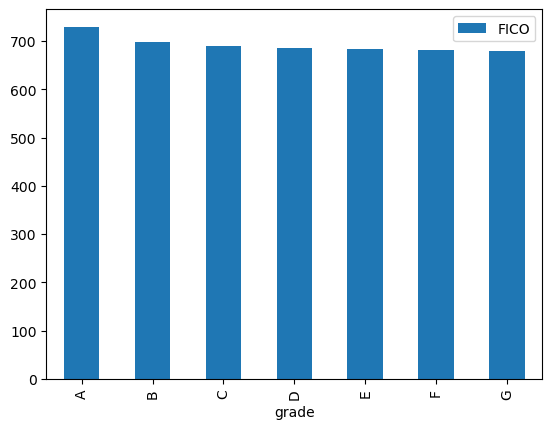

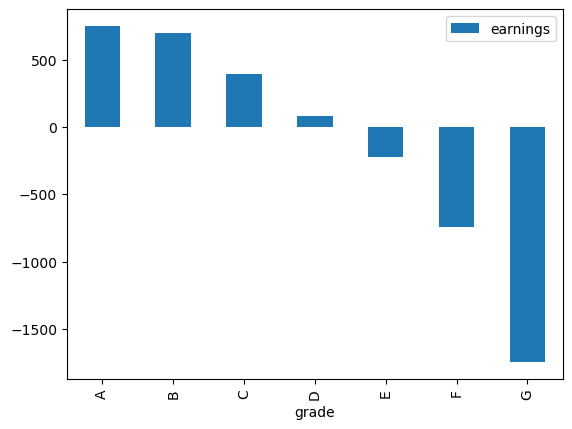

In [35]:
for col in numer_mean:
    numer_mean.plot(y=col,kind='bar')

Graphs that show strong continuous relationship with grade:
- Loan amount
- Funded amount/Funded amount by investor
- Term
- Interest rate
- Installment
- DTI (Plateaus in lower grades)
- Inquiries in last 6 months 
- Revolving utility (Plateaus in lower grades)
- Total payment/Total payment to investor
    - Total received interest
    - Total received late fees
    - Recoveries
    - Collection recovery fees
    - Last payment amount
- Last FICO high/low
- Open accounts in last 6 months
- open installment acounts in last 12/24 months
- Open revolving trades in last 12/24 months
- All utility
- Inquiries into personal finances
- Inquiries in last 12/24 months
- Number accounts opened in last 12 months

Overall, unsurprisingly, the higher grades show trends of greater financial health. They are associated with more funds in accounts, higher income, and fewer inquiries/delinquincies/collections, etc. The higher grades also show fewer accounts/trades opened in the last month periods. This could suggest more financial stability as new accounts could be used to cover specific goals such as funding a mortgage or other loan for borrowers with less assets.

Data to investigate further before model generation:
- Loan amount vs grade, loan status, & ROI
- Term vs grade, loan status, & ROI
- Interest rate vs grade, loan status, & ROI
- DTI vs grade, loan status, & ROI
- FICO vs grade, loan status, & ROI

#### Loan Amount Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

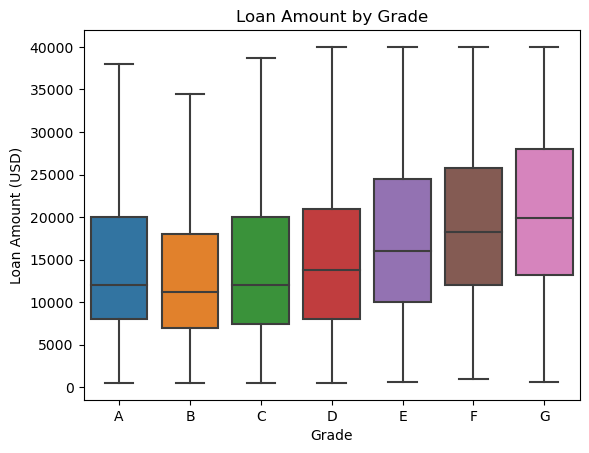

In [36]:
sns.boxplot(x=completed['grade'],y=completed['loan_amnt'],order=['A', 'B', 'C','D','E','F','G'],showfliers=False)
plt.xlabel('Grade')
plt.ylabel('Loan Amount (USD)')
plt.title('Loan Amount by Grade')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

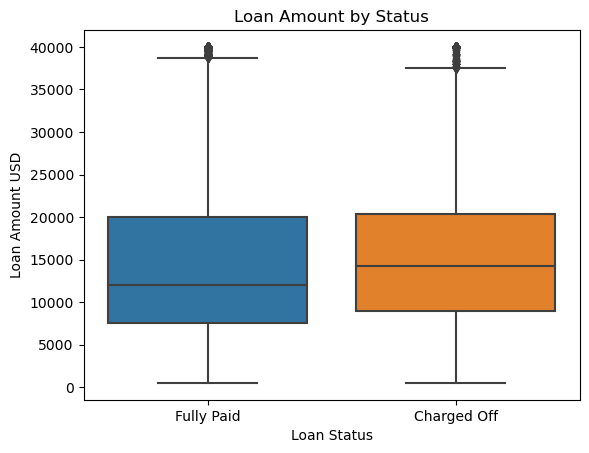

In [37]:
sns.boxplot(x=completed['loan_status'],y=completed['loan_amnt'])
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount USD')
plt.title('Loan Amount by Status')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

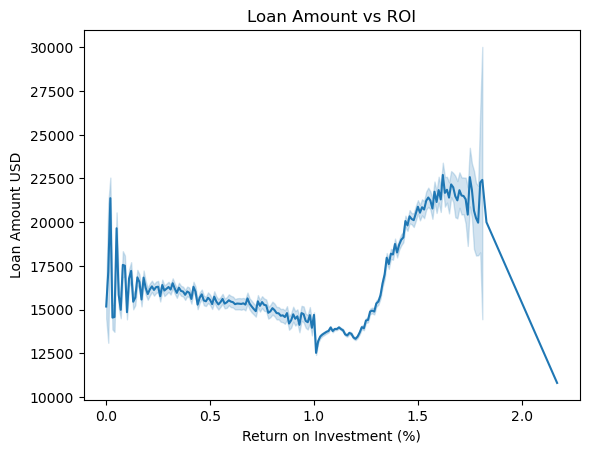

In [38]:
sns.lineplot(x=completed['ROI'],y=completed['loan_amnt'])
plt.xlabel('Return on Investment (%)')
plt.ylabel('Loan Amount USD')
plt.title('Loan Amount vs ROI')
plt.show


#bin loan amount and get boxplot of ROI

#### Term Visualizations

In [39]:
loan_amount = completed.groupby('grade')['term'].value_counts().to_frame()
loan_amount = loan_amount.rename(columns={'term':'Count'})
loan_amount

Count
grade term        
A     36.0  228855
      60.0    6290
B     36.0  345222
      60.0   47829
C     36.0  276646
      60.0  105608
D     36.0  126636
      60.0   74968
E     60.0   57719
      36.0   36445
F     60.0   24821
      36.0    7473
G     60.0    7643
      36.0    1671

In [40]:
loan_amount = loan_amount.reset_index()
loan_amount

,grade,term,Count
0,A,36.0,228855
1,A,60.0,6290
2,B,36.0,345222
3,B,60.0,47829
4,C,36.0,276646
5,C,60.0,105608
6,D,36.0,126636
7,D,60.0,74968
8,E,60.0,57719
9,E,36.0,36445


In [41]:
loan_amount['term'] = loan_amount['term'].astype('string')
loan_amount['GradeTerm'] = loan_amount['grade'] + ' '+ loan_amount['term']
loan_amount = loan_amount.drop(columns=['grade','term'])
loan_amount

,Count,GradeTerm
0,228855,A 36.0
1,6290,A 60.0
2,345222,B 36.0
3,47829,B 60.0
4,276646,C 36.0
5,105608,C 60.0
6,126636,D 36.0
7,74968,D 60.0
8,57719,E 60.0
9,36445,E 36.0


<function matplotlib.pyplot.show(close=None, block=None)>

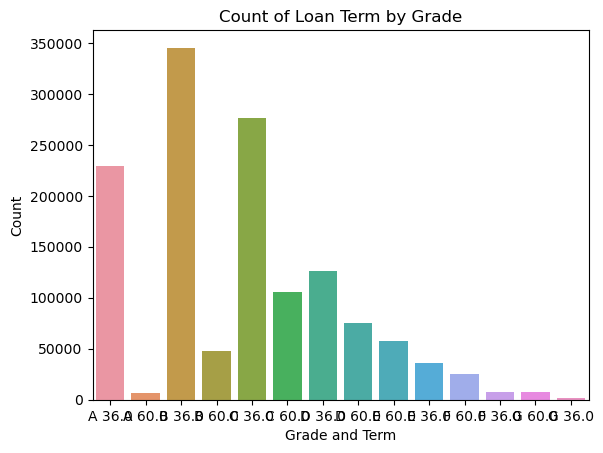

In [42]:
sns.barplot(x=loan_amount['GradeTerm'],y=loan_amount['Count'])
plt.xlabel('Grade and Term')
plt.ylabel('Count')
plt.title('Count of Loan Term by Grade')
plt.rcParams['figure.figsize']=(12,3)
plt.show

In [43]:
loan_amount = completed.groupby('loan_status')['term'].value_counts().to_frame()
loan_amount = loan_amount.rename(columns={'term':'Count'})
loan_amount

Count
loan_status term        
Charged Off 36.0  163845
            60.0  105419
Fully Paid  36.0  859103
            60.0  219459

In [44]:
loan_amount = loan_amount.reset_index()
loan_amount

,loan_status,term,Count
0,Charged Off,36.0,163845
1,Charged Off,60.0,105419
2,Fully Paid,36.0,859103
3,Fully Paid,60.0,219459


In [45]:
loan_amount['term'] = loan_amount['term'].astype('string')
loan_amount['StatusTerm'] = loan_amount['loan_status'] +  ' '+ loan_amount['term']
loan_amount = loan_amount.drop(columns=['loan_status','term'])
loan_amount

,Count,StatusTerm
0,163845,Charged Off 36.0
1,105419,Charged Off 60.0
2,859103,Fully Paid 36.0
3,219459,Fully Paid 60.0


<function matplotlib.pyplot.show(close=None, block=None)>

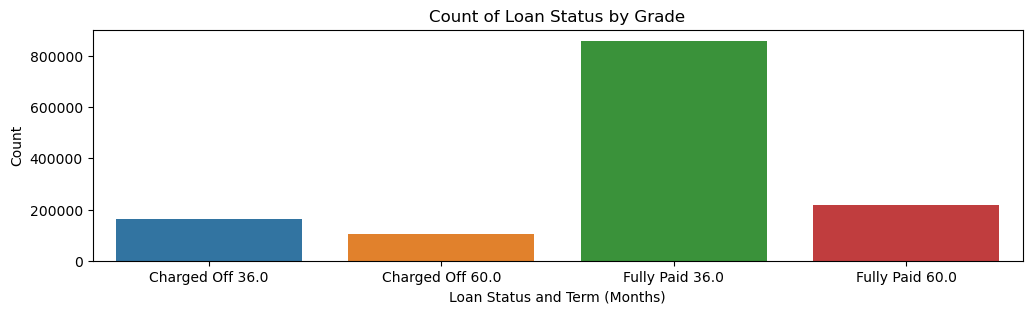

In [46]:
sns.barplot(x=loan_amount['StatusTerm'],y=loan_amount['Count'])
plt.xlabel('Loan Status and Term (Months)')
plt.ylabel('Count')
plt.title('Count of Loan Status by Grade')
plt.rcParams['figure.figsize']=(12,3)
plt.show

# use % of charge off, consolidate to only 36vs 60

In [47]:
coperc = completed[['term','loan_status']]
cop = coperc.groupby('term')['loan_status'].value_counts().to_frame()
cop = cop.rename(columns={'loan_status':'status'}).reset_index()
cop

,term,loan_status,status
0,36.0,Fully Paid,859103
1,36.0,Charged Off,163845
2,60.0,Fully Paid,219459
3,60.0,Charged Off,105419


In [48]:
termcop = pd.DataFrame({'Term':['36','60'],'Charge Off %':['16.0','32.4']})
termcop['Term'] = termcop['Term'].astype(float)
termcop['Charge Off %'] = termcop['Charge Off %'].astype(float)
termcop

,Term,Charge Off %
0,36.0,16.0
1,60.0,32.4


<function matplotlib.pyplot.show(close=None, block=None)>

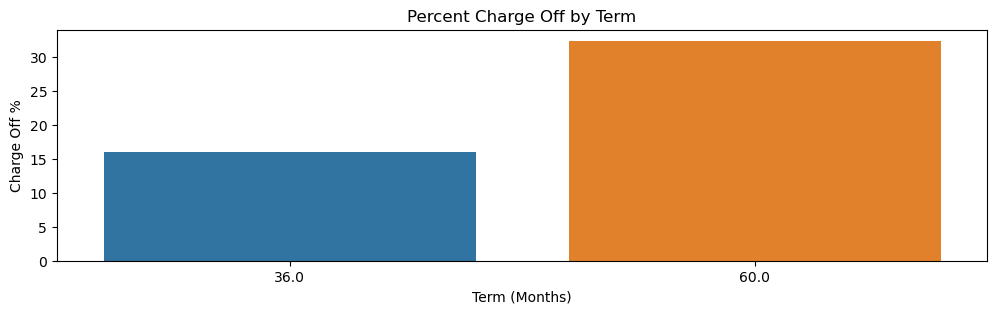

In [49]:
sns.barplot(x=termcop['Term'],y=termcop['Charge Off %'])
plt.xlabel('Term (Months)')
plt.ylabel('Charge Off %')
plt.title('Percent Charge Off by Term')
plt.rcParams['figure.figsize']=(5,5)
plt.show

In [50]:
loanval = completed[['term','loan_amnt']]
loanv = loanval.groupby('term')['loan_amnt'].mean().round(2).to_frame().reset_index()
loanv

,term,loan_amnt
0,36.0,12540.25
1,60.0,20299.19


<function matplotlib.pyplot.show(close=None, block=None)>

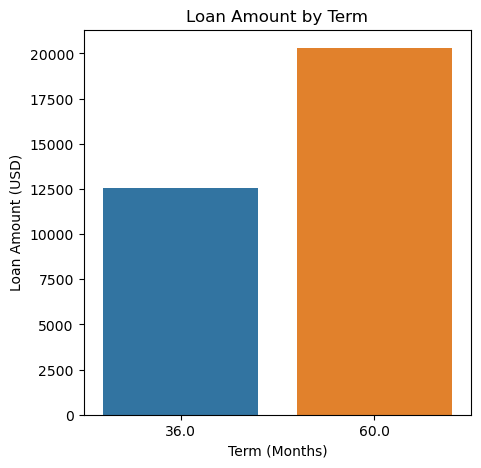

In [51]:
sns.barplot(x=loanv['term'],y=loanv['loan_amnt'])
plt.xlabel('Term (Months)')
plt.ylabel('Loan Amount (USD)')
plt.title('Loan Amount by Term')
plt.rcParams['figure.figsize']=(5,5)
plt.show

In [52]:
lstatus['FP%'] = ((lstatus['FP Count']*100)/(lstatus['FP Count']+lstatus['CO Count'])).round(2)
lstatus['CO%'] = ((lstatus['CO Count']*100)/(lstatus['FP Count']+lstatus['CO Count'])).round(2)

<function matplotlib.pyplot.show(close=None, block=None)>

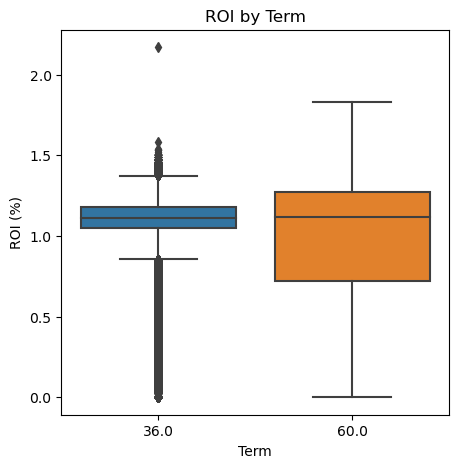

In [53]:
sns.boxplot(x=completed['term'],y=completed['ROI'])
plt.xlabel('Term')
plt.ylabel('ROI (%)')
plt.title('ROI by Term')
plt.rcParams['figure.figsize']=(3,3)
plt.show

#### Interest Rate Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

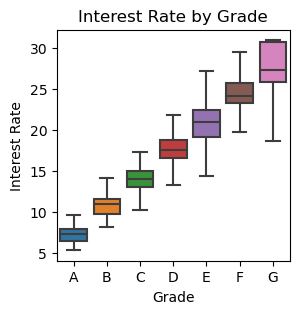

In [54]:
sns.boxplot(x=completed['grade'],y=completed['int_rate'],order=['A', 'B', 'C','D','E','F','G'],showfliers = False)
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Interest Rate by Grade')
plt.rcParams['figure.figsize']=(5,5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

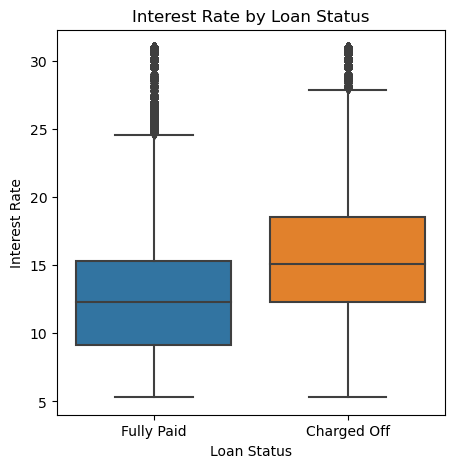

In [55]:
sns.boxplot(x=completed['loan_status'],y=completed['int_rate'])
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Interest Rate by Loan Status')
plt.rcParams['figure.figsize']=(5,5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

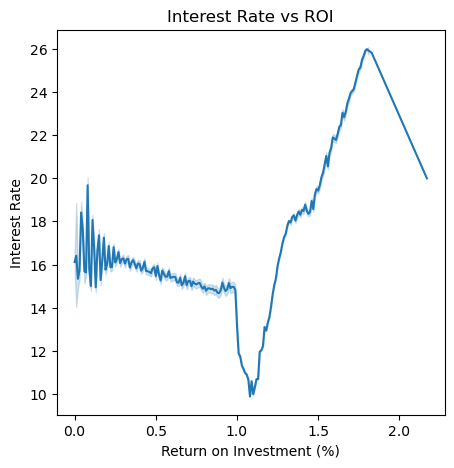

In [56]:
sns.lineplot(x=completed['ROI'],y=completed['int_rate'])
plt.xlabel('Return on Investment (%)')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs ROI')
plt.show

#### DTI Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

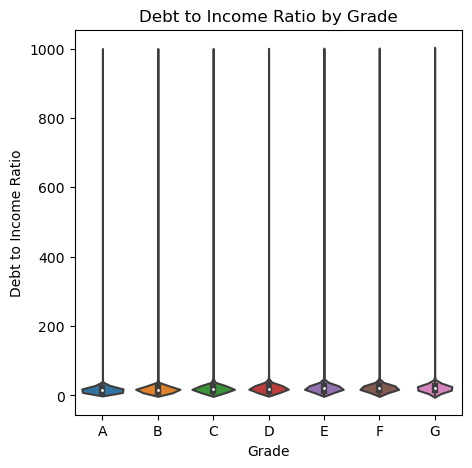

In [57]:
sns.violinplot(x=completed['grade'],y=completed['dti'],order=['A', 'B', 'C','D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('Debt to Income Ratio')
plt.title('Debt to Income Ratio by Grade')
plt.rcParams['figure.figsize']=(3,10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

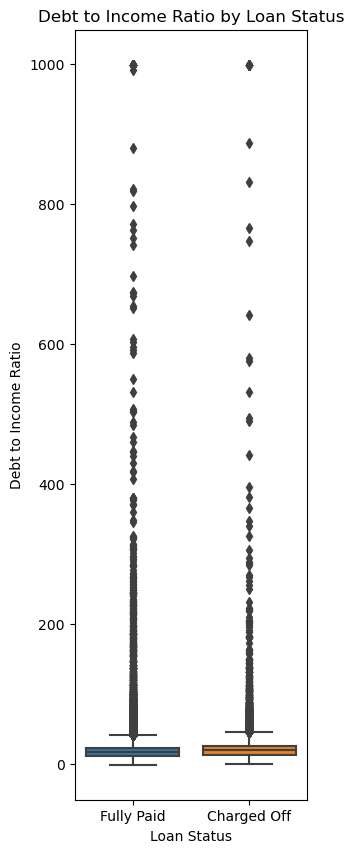

In [58]:
sns.boxplot(x=completed['loan_status'],y=completed['dti'])
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.title('Debt to Income Ratio by Loan Status')
plt.rcParams['figure.figsize']=(5,5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

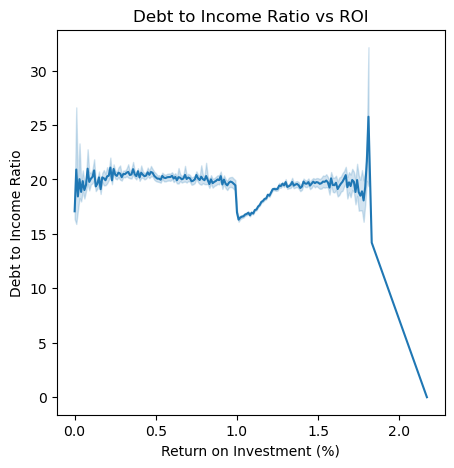

In [59]:
sns.lineplot(x=completed['ROI'],y=completed['dti'])
plt.xlabel('Return on Investment (%)')
plt.ylabel('Debt to Income Ratio')
plt.title('Debt to Income Ratio vs ROI')
plt.show

#### FICO Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

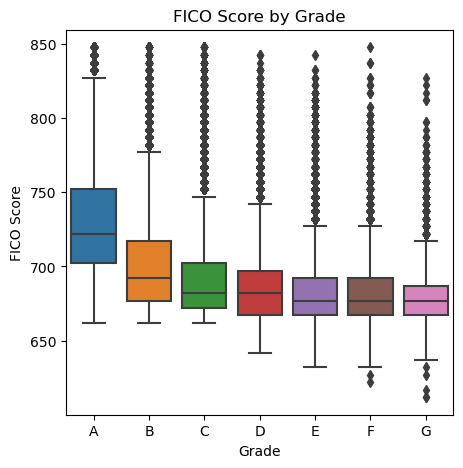

In [60]:
sns.boxplot(x=completed['grade'],y=completed['FICO'],order=['A', 'B', 'C','D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('FICO Score')
plt.title('FICO Score by Grade')
plt.rcParams['figure.figsize']=(10,5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

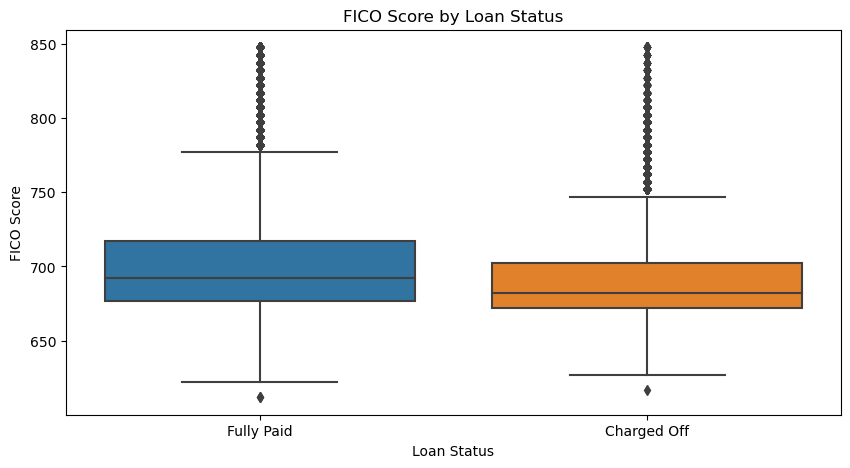

In [61]:
sns.boxplot(x=completed['loan_status'],y=completed['FICO'])
plt.xlabel('Loan Status')
plt.ylabel('FICO Score')
plt.title('FICO Score by Loan Status')
plt.rcParams['figure.figsize']=(5,5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

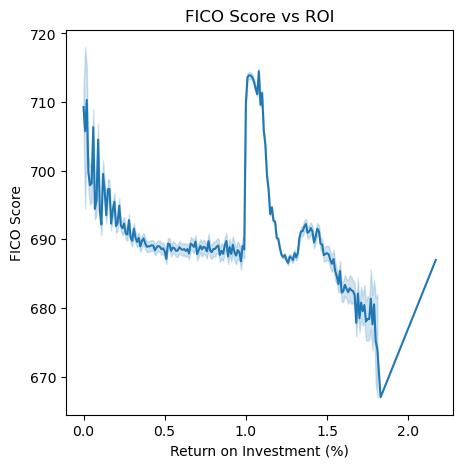

In [62]:
sns.lineplot(x=completed['ROI'],y=completed['FICO'])
plt.xlabel('Return on Investment (%)')
plt.ylabel('FICO Score')
plt.title('FICO Score vs ROI')
plt.show

### Export completed/incomplete datasets for model generation file

In [63]:
completed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,ROI,FICO,earnings
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10.0,MORTGAGE,55000.0,Not Verified,Fully Paid,n,Debt consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,1.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,1.23,677.0,828.0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10.0,MORTGAGE,65000.0,Not Verified,Fully Paid,n,Business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,4.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,1.04,717.0,988.0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10.0,MORTGAGE,63000.0,Not Verified,Fully Paid,n,Other,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,5.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,1.14,697.0,2800.0
4,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3.0,MORTGAGE,104433.0,Source Verified,Fully Paid,n,Major purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,6.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,1.13,697.0,1352.0
5,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,C3,4.0,RENT,34000.0,Source Verified,Fully Paid,n,Debt consolidation,GA,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,1.15,692.0,1792.5


In [64]:
incomplete = accepted.copy()
incomplete = incomplete.loc[(incomplete['loan_status'] != 'Fully Paid') & (incomplete['loan_status'] != 'Charged Off')]
incomplete['loan_status'].value_counts()

Current               878317
Late (31-120 days)     21467
In Grace Period         8436
Late (16-30 days)       4349
Default                   40
Name: loan_status, dtype: int64

### Default payments visualization

In [66]:
accepted.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,ROI,FICO
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10.0,MORTGAGE,55000.0,Not Verified,Fully Paid,n,Debt consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,1.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,1.23,677.0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10.0,MORTGAGE,65000.0,Not Verified,Fully Paid,n,Business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,4.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,1.04,717.0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10.0,MORTGAGE,63000.0,Not Verified,Fully Paid,n,Other,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,5.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,1.14,697.0
3,35000.0,35000.0,35000.0,60.0,14.85,829.90,C,C5,10.0,MORTGAGE,110000.0,Source Verified,Current,n,Debt consolidation,NJ,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,1.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,0.90,787.0
4,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3.0,MORTGAGE,104433.0,Source Verified,Fully Paid,n,Major purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,6.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,1.13,697.0


In [76]:
accepted['late'] = accepted['total_rec_late_fee']+accepted['recoveries']+accepted['collection_recovery_fee']

In [102]:
lstatus['grade'] = ['A','B','C','D','E','F','G']

default = accepted.groupby(accepted['grade'])['late'].mean().to_frame()
default = default.rename(columns={'late':'Fees'}).round(2)
default

lstatus = pd.merge(lstatus,default,on='grade',how='outer')
lstatus['Fees'] = lstatus['Fees'].round(2)

,grade,FP Count,CO Count,FP%,CO%,Fees_x,Fees_y,Fees
0,A,220938,14207,93.96,6.04,31.558331,31.558331,31.56
1,B,340410,52641,86.61,13.39,84.217606,84.217606,84.22
2,C,296471,85783,77.56,22.44,170.921215,170.921215,170.92
3,D,140369,61235,69.63,30.37,283.276299,283.276299,283.28
4,E,57978,36186,61.57,38.43,500.460815,500.460815,500.46
5,F,17712,14582,54.85,45.15,759.352663,759.352663,759.35
6,G,4684,4630,50.29,49.71,882.876976,882.876976,882.88


In [104]:
lstatus

,grade,FP Count,CO Count,FP%,CO%,Fees
0,A,220938,14207,93.96,6.04,31.56
1,B,340410,52641,86.61,13.39,84.22
2,C,296471,85783,77.56,22.44,170.92
3,D,140369,61235,69.63,30.37,283.28
4,E,57978,36186,61.57,38.43,500.46
5,F,17712,14582,54.85,45.15,759.35
6,G,4684,4630,50.29,49.71,882.88
